# Computer Science 2XC3 - Graded Lab II

In this day and age, it is very easy to generate automated solutions to any problem, not necessarily becuase of AI, but because of vast online communities that exist to find solution to popular/common problems. Whether or not that solution is correct and applicable to our context,  can be assessed only if we understand the concepts and can critically evaluate them. The goal of this lab is to motivate you to not only produce the correct solution to problems, but also to reflect about why, how and when your solution will likely succeed/fail. 

In this lab you will design experiments with sorting and search algorithms. Please read all instructions carefully. Seek the help of TA's if you need clarifications on the task. Do not hard code any results.

In [11]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np

---
---

### Part A

##### A1. Implement three classes with the following sorting algorithms:
- Bubble Sort
- Insertion Sort
- Selection Sort

In [12]:
class BubbleSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

    def bubblesort(self):
        n = len(self.items)
        self.sorted_items = self.items.copy()

        for i in range(n):
            for j in range(0, n-i-1):#go through unsorted part of array with current element 
                if self.sorted_items[j] > self.sorted_items[j+1]:#swap condiiton 
                    self.sorted_items[j], self.sorted_items[j+1] = self.sorted_items[j+1], self.sorted_items[j]

    def get_sorted(self,):
        return self.sorted_items

In [13]:
xs = [5,7,3,1,2,0]
bsOBJ = BubbleSort(xs)
bsOBJ.bubblesort()
sorted_xs = bsOBJ.get_sorted()

print(sorted_xs)

[0, 1, 2, 3, 5, 7]


In [14]:
class InsertionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

    def insertionsort(self):
        arr = self.items
        n = len(arr)
        for i in range(1, n):
            current_element = arr[i]
            index = i - 1
            while index >= 0 and current_element < arr[index]:
                arr[index + 1] = arr[index]
                index -= 1
            arr[index + 1] = current_element
        self.sorted_items = arr.copy()

    def get_sorted(self,):
        return self.sorted_items

In [15]:
xs = [5,7,3,1,2,0,9]
isOBJ = InsertionSort(xs)
isOBJ.insertionsort()
sorted_xs = isOBJ.get_sorted()

print(sorted_xs)

[0, 1, 2, 3, 5, 7, 9]


In [16]:
class SelectionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

    def selectionsort(self):
        arr = self.items
        n = len(arr)

        for i in range(n):
            min_index = i
            for j in range(i + 1, n):
                if arr[j] < arr[min_index]:
                    min_index = j
            arr[i], arr[min_index] = arr[min_index], arr[i]
        self.sorted_items = arr.copy()

    def get_sorted(self,):
        return self.sorted_items

In [17]:
xs = [5,7,3,1,2,0,9,17]
ssOBJ = SelectionSort(xs)
ssOBJ.selectionsort()
sorted_xs = ssOBJ.get_sorted()

print(sorted_xs)

[0, 1, 2, 3, 5, 7, 9, 17]


___

##### A2. Compute the performance of above 3 algorithms on a single list of real numbers.

First generate a custom random list using function <code> create_custom_list()</code>. Execute each of the above algorithm for N trials ( select N >= 75) on the list and plot the timing of each execution on a bar chart. Also calculate the average execution time for the entire batch of N trials ( you can either display it on the chart or simply <code> print()</code> it). For larger values of N, consider breaking N trials into mini batches of n executions and plotting execution times for each mini batch. For instance, if you select N=1000, to plot execution timings for 1000 trials, you may break them into mini batch of n=10 trials and display average of each mini batch. This will reduce clutter in your bar charts while still enabling you to perform extensive testing with higher N.

Execute each of the above algorithm on the same set of integers. The outcome of your code should be 3 charts for each algorithm run on your list N times. Few utility functions are given below. You do not have to necessarily use the <code> draw_plot()</code> function. You can plot your timings using an excel sheet and paste the image of your timings here. Refer to [Markdown Guide](https://www.markdownguide.org/basic-syntax/) on how to add images in the jupyter notebook or ask your TA.

In [18]:
def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

In [19]:
def draw_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

def show_plot(label,run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.xticks(x, label, rotation ='vertical')
    plt.axhline(np.mean(run_arr), color="red", linestyle="--", label="Avg")
    plt.title("Run time for binary search cases")
    plt.xlabel("Binary Search cases")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.show()
    

def draw_plot_batches(run_arr, N, batchsize):
    x = np.arange(0, len(run_arr), 1)
    fig = plt.figure(figsize=(20, 8))
    
    average_runtime = np.mean(run_arr)
    
    plt.bar(x, run_arr)
    plt.axhline(average_runtime, color="red", linestyle="--", label="Avg")
    plt.xlabel("Batches")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for string (" + str(N) + " iterations and Batch size = " + str(batchsize) + ")")
    plt.legend()

    plt.text(len(run_arr), average_runtime, f'Avg: {average_runtime}', color='red')
    plt.show()


my_list = create_custom_list(1000,200) #use this list of length 1000 with max element 200


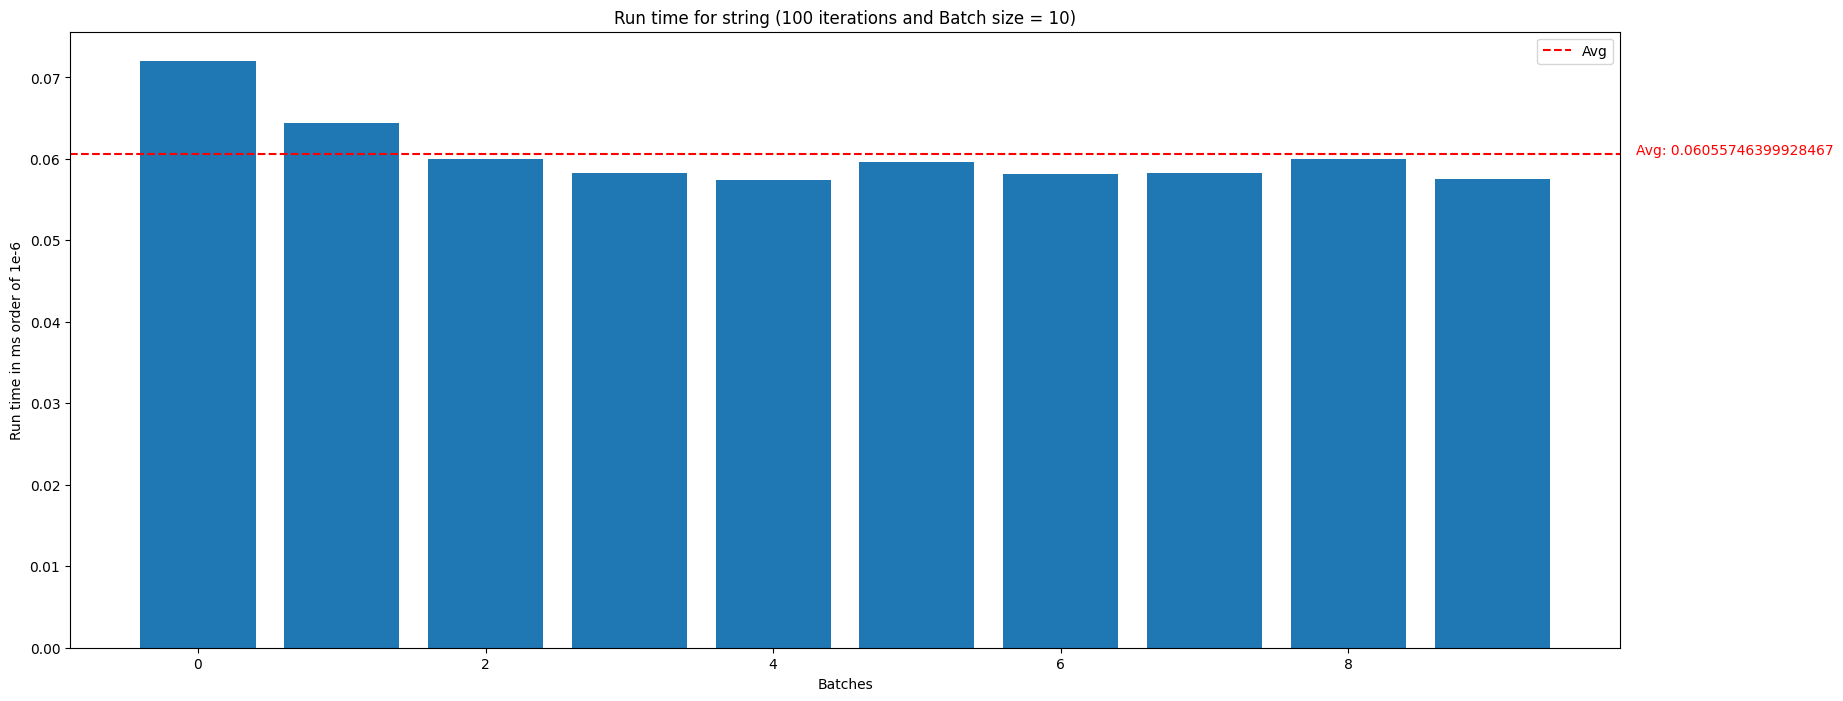

In [10]:
### Bubble sort experiment code goes here

#incomplete 

def bubblesort_time(N, xs,batch_size):
    if N < 75:
        run_times=[]
        for _ in range(N):
            temp_list = my_list_bubble.copy()
            start= timeit.default_timer()
            bubbleclass = BubbleSort(temp_list)
            bubbleclass.bubblesort()
            stop=timeit.default_timer()
            run_times.append(stop-start)
        draw_plot_batches(run_times, N,batch_size)
    else: 
        run_times=[] #this will be mapped to x later
        for _ in range(N):
            temp_list = my_list_bubble.copy()  # Create a new copy for each iteration
            start = timeit.default_timer()
            insclass = BubbleSort(temp_list)
            insclass.bubblesort()
            stop = timeit.default_timer()
            run_times.append(stop - start)

        batches = [0.0] * (N // batch_size) #this is number of batches we will need 

        for i in range(N):
            batches[i//batch_size] += run_times[i] #map run times to batches 

        for i in range(len(batches)): #batch averages 
            batches[i] /= batch_size
        draw_plot_batches(batches,N,batch_size)
    

my_list_bubble = my_list.copy()
#bubblesort_time(10,my_list_bubble, 1)
bubblesort_time(100,my_list_bubble, 10)
#bubblesort_time(1000,my_list_bubble, 100)



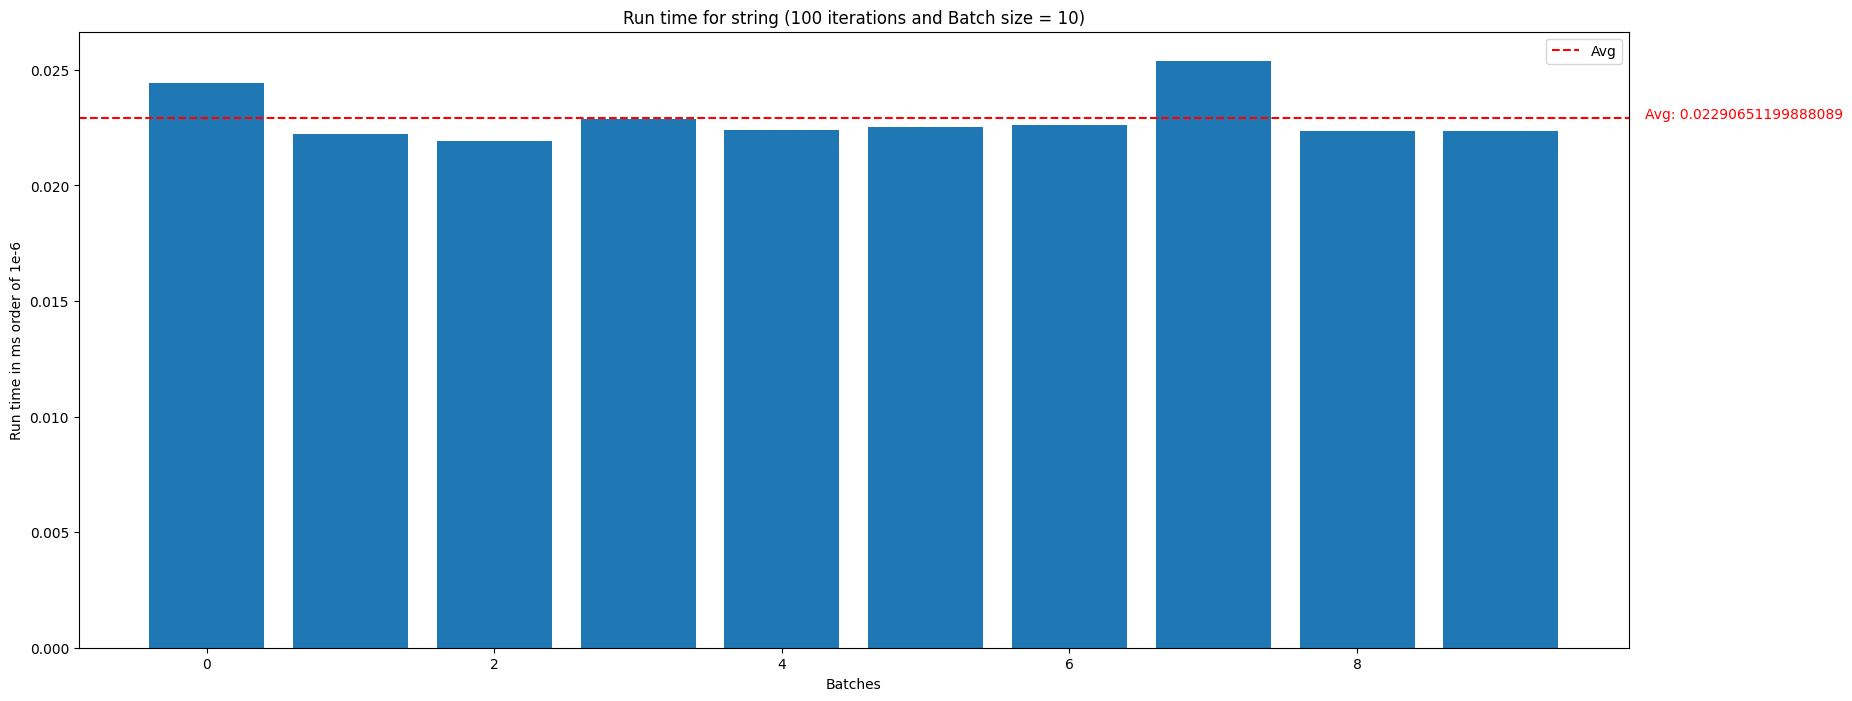

In [11]:
### Insertion sort experiment code goes here
def insertionsort_time(N, xs,batch_size):
    if N < 75:
        run_times=[]
        for _ in range(N):
            temp_list = my_list_bubble.copy()
            start= timeit.default_timer()
            bubbleclass = InsertionSort(temp_list)
            bubbleclass.insertionsort()
            stop=timeit.default_timer()
            run_times.append(stop-start)
        draw_plot_batches(run_times, N,batch_size)
    else: 
        run_times=[] #this will be mapped to x later
        for _ in range(N):
            temp_list = my_list_bubble.copy()  # Create a new copy for each iteration
            start = timeit.default_timer()
            insclass = InsertionSort(temp_list)
            insclass.insertionsort()
            stop = timeit.default_timer()
            run_times.append(stop - start)

        batches = [0.0] * (N // batch_size) #this is number of batches we will need 

        for i in range(N):
            batches[i//batch_size] += run_times[i] #map run times to batches 

        for i in range(len(batches)): #batch averages 
            batches[i] /= batch_size
        draw_plot_batches(batches,N,batch_size)

my_list_insert = my_list.copy()
#insertionsort_time(10,my_list_insert, 1)
insertionsort_time(100,my_list_insert, 10)
#insertionsort_time(1000,my_list_insert, 100)

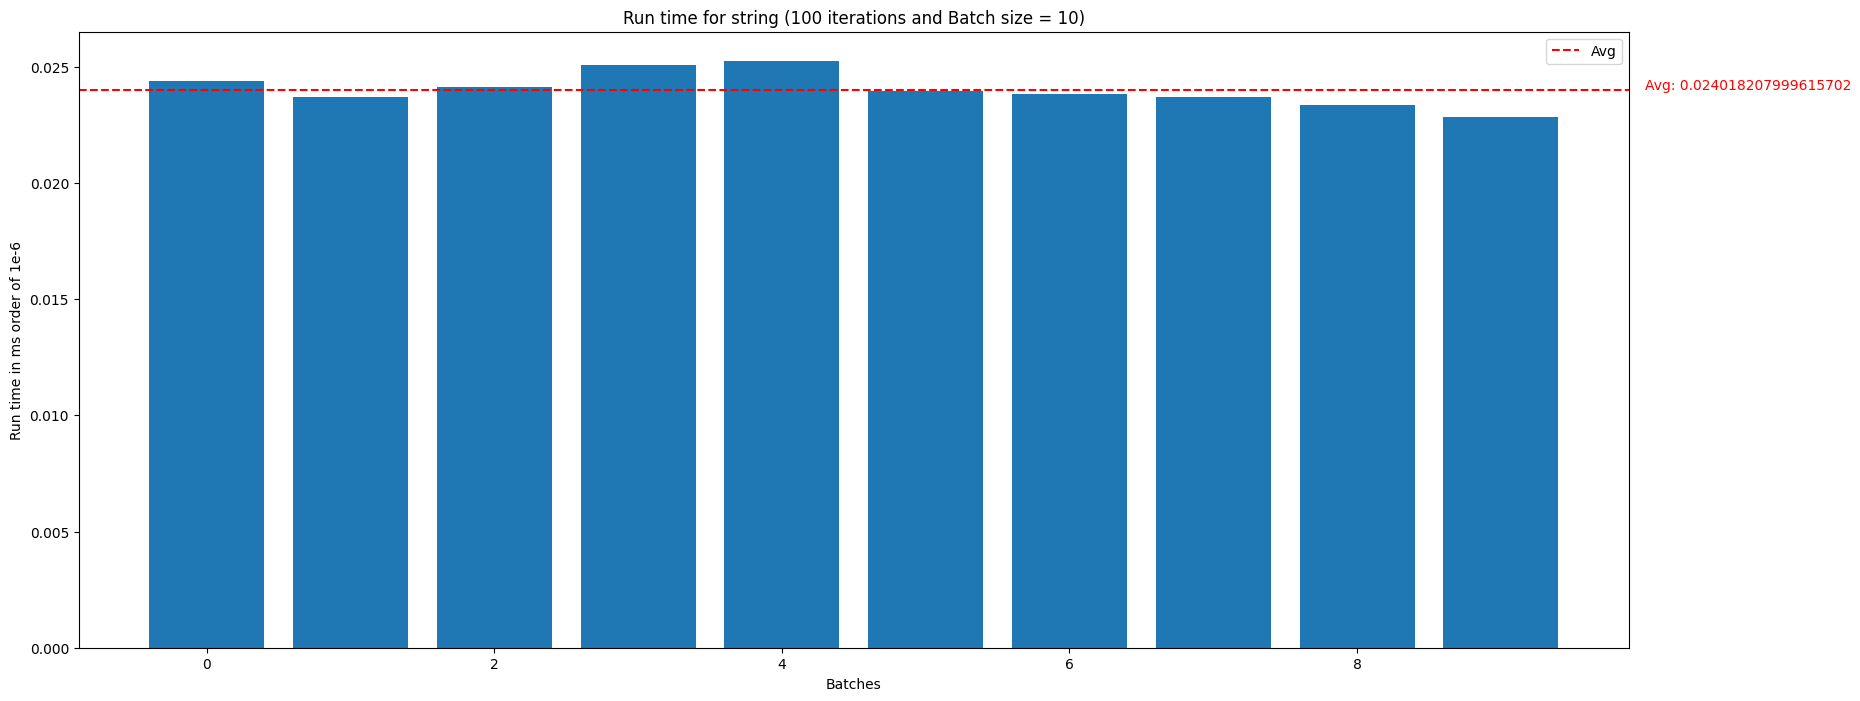

In [12]:
### Selection sort experiment code goes here
def selection_time(N, xs,batch_size):
    if N < 75:
        run_times=[]
        for _ in range(N):
            temp_list = my_list_bubble.copy()
            start= timeit.default_timer()
            bubbleclass = SelectionSort(temp_list)
            bubbleclass.selectionsort()
            stop=timeit.default_timer()
            run_times.append(stop-start)
        draw_plot_batches(run_times, N,batch_size)
    else: 
        run_times=[] #this will be mapped to x later
        for _ in range(N):
            temp_list = my_list_bubble.copy()  # Create a new copy for each iteration
            start = timeit.default_timer()
            insclass = SelectionSort(temp_list)
            insclass.selectionsort()
            stop = timeit.default_timer()
            run_times.append(stop - start)

        batches = [0.0] * (N // batch_size) #this is number of batches we will need 

        for i in range(N):
            batches[i//batch_size] += run_times[i] #map run times to batches 

        for i in range(len(batches)): #batch averages 
            batches[i] /= batch_size
        draw_plot_batches(batches,N,batch_size)

my_list_selection = my_list.copy()
#selection_time(10,my_list_selection, 1)
selection_time(100,my_list_selection, 10)
#selection_time(1000,my_list_selection, 100)

You would notice that certain sorting algorithms have better time complexity (or performance) than others. Write below a reflection of your observations. Can you confidently compare the performance across the 3 algorithms? Why does certain algorithm perform better than the other? What are the various factors impacting the best performing and the worst performing algorithm. Write a few sentences answering each of the above questions. Also describe any other observation you found important.

**Reflection**:
Here are some the sample test cases   

N = 10, batch_size = 1  
Bubblesort_time = 0.0515  
Insertionsort_time = 0.0198  
Selectionsort_time = 0.0201  
  
N = 100, batch_size = 10  
Bubblesort_time = 0.0552  
Insertionsort_time = 0.0209  
Selectionsort_time = 0.0222  
 
N = 1000, batch_size = 100  
Bubblesort_time = 0.058  
Insertionsort_time = 0.0225  
Selectionsort_time = 0.0232  

Recall from 2c03, all theree algorithms are O(n^2) for worst case time complexity. However in cases with almost sorted arrays, Insertion sort is O(n). In all three sample cases, insertion sort has had the best time, with selection trailing a bit behind. Bubblesort is significantly slower than the other 2. We are unsure if the tested arrays were completely unsorted or nearly sorted however it can be assumed there are some instances between all runs. 

Insertion sort is known as an adaptive algorithm, meaning that it is ideal for arrays that are already patially sorted. It can be assumed many random arrays are always not completely unsorted, therefore insertion sort performed well. 

Similar to insertion sort, selection sort also performs well with partially sorted arrays since it minimizes the number of swaps it must do. The swapping process only happens when something is out of order. However it still needs to find min and upadte min as the program runs

Bubble sort needs to swap and compare with all elements, therefore it can't skip any steps. Therefore it is always O(n^2)

The theory behind the performance of each algorithm is supported by the sample test cases. 


##### A3. Compute the performance of above 3 algorithms on a different list sizes.

The <code> create_custom_list()</code> helps you create lists of varying lengths and range of numbers. Plot a **line chart** that shows the performance of each algorithm on different list sizes ranging between 1 - 100,000 integers. If you think about this question, you are essentially plotting the time complexity on various list sizes. 

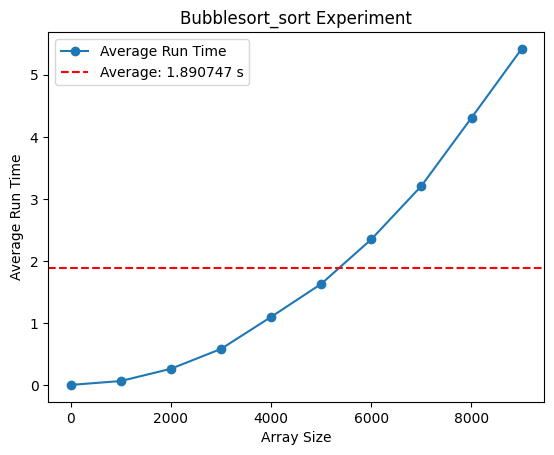

In [32]:
### Bubble sort experiment code goes here
def bubble_sort_experiment(r1, r2, incr, runs):
    sizes = list(range(r1, r2, incr))
    output = []

    for s in sizes:
        custom_list = create_custom_list(s, 1000)  # [list of len s, with max number as 1000]

        avg = 0
        for _ in range(runs):
            start = timeit.default_timer()
            bubbleclass = BubbleSort(custom_list)
            bubbleclass.bubblesort()
            stop = timeit.default_timer()
            avg += stop - start

        avg /= runs
        output.append(avg)

    average_value = sum(output) / len(output)

    plt.plot(sizes, output, marker='o', label='Average Run Time')
    plt.axhline(y=average_value, color='r', linestyle='--', label=f'Average: {average_value:.6f} s')
    plt.title('Bubblesort_sort Experiment')
    plt.xlabel("Array Size")
    plt.ylabel("Average Run Time")
    plt.legend()
    plt.show()

#bubble_sort_experiment(1, 1000, 100, 5)
bubble_sort_experiment(1, 10000, 1000, 5)
#bubble_sort_experiment(1, 100001, 10000, 5) 


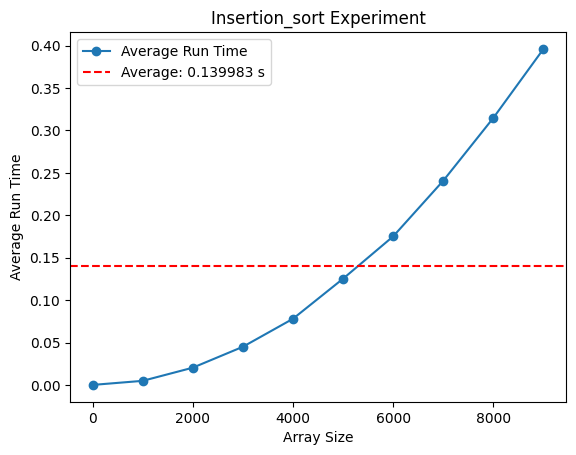

In [31]:
### Insertion sort experiment code goes here

def insertion_sort_experiment(r1, r2, incr, runs):
    sizes = list(range(r1, r2, incr))
    output = []

    for s in sizes:
        custom_list = create_custom_list(s, 1000)  # [list of len s, with max number as 1000]

        avg = 0 
        for _ in range(runs):
            start_time = timeit.default_timer()
            insertion_class = InsertionSort(custom_list)
            insertion_class.insertionsort()
            stop_time = timeit.default_timer()
            avg += stop_time - start_time

        avg /= runs
        output.append(avg)

    average_value = sum(output) / len(output)

    plt.plot(sizes, output, marker='o', label='Average Run Time')
    plt.axhline(y=average_value, color='r', linestyle='--', label=f'Average: {average_value:.6f} s')
    plt.title('Insertion_sort Experiment')
    plt.xlabel("Array Size")
    plt.ylabel("Average Run Time")
    plt.legend()
    plt.show()



#insertion_sort_experiment(1, 1000, 100, 5)    
insertion_sort_experiment(1, 10000, 1000, 5)        
#insertion_sort_experiment(1, 100001, 10000, 5) 

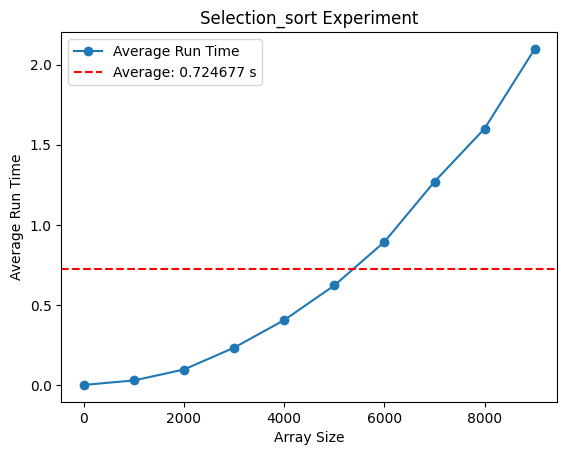

In [33]:
### Selection sort experiment code goes here

def selection_sort_experiment(r1, r2, incr, runs):
    sizes = list(range(r1, r2, incr))
    output = []

    for s in sizes:
        custom_list = create_custom_list(s, 1000)  # [list of len s, with max number as 1000]

        avg = 0 
        for _ in range(runs):
            start = timeit.default_timer()
            selectionclass = SelectionSort(custom_list)
            selectionclass.selectionsort()
            stop = timeit.default_timer()
            avg += stop - start

        avg /= runs
        output.append(avg)

    average_value = sum(output) / len(output)

    plt.plot(sizes, output, marker='o', label='Average Run Time')
    plt.axhline(y=average_value, color='r', linestyle='--', label=f'Average: {average_value:.6f} s')
    plt.title('Selection_sort Experiment')
    plt.xlabel("Array Size")
    plt.ylabel("Average Run Time")
    plt.legend()
    plt.show()

#selection_sort_experiment(1, 1000, 100, 5)  
selection_sort_experiment(1, 10000, 1000, 5)
#selection_sort_experiment(1, 100001, 10000, 5)

Describe you results here. What did you observe when comparing the charts? Which algorithm was more performant and why?

**Reflection** :

Test Cases  
r1, r2, incr, runs = 1, 1000, 100, 5  
Bubblesort = 0.016680 s  
Insertionsort = 0.001420 s  
Secltion sort = 0.007027 s  


r1, r2, incr, runs = 1, 10000, 1000, 5  
Bubblesort = 1.890747 s  
Insertionsort = 0.139983 s  
Secltion sort = 0.724677 s  


The experiment checks the performance of each algorithm on different list sizes ranges. It is evident that as the array size increases, the time taken to compute also increases. Given information from 2C03 and the earlier experiment the below information is tested. 

Bubble sort:
O(n) -> if list is always sorted 
O(n^2) -> is list is unsorted 

Insertioin sort 
O(n) -> if list is sorted 
O(n^2) -> is list is unsorted 

Selection sort:
O(n^2) -> with both sorted/unsorted list 

As seen with the sameple test case, the average time taken per iteration of all array sizes with bubblesort is signficantly slower than the other two algorithms. It is also seen that when the array size is smaller, the difference between the performances of insertionsort and selection sort is vast, however when the array size increases, the difference between selection sort and insertion sort becomes more similar. This is because insertion sort is adviced to use for larger data sets. As previosuly expalined in the last reflection, the adaptive properties of insertion sort make it ideal for large data sets. 

Below are the conlclusions observed. 
- Bubble sort is the slowest with all array sizes 
- As array sizes increase, insertion sort performs the best 






---

##### A4. Compute the performance of above 3 algorithms on a different list "states".

Using the same above list generation function (or writing a function of your own), create two different lists states: 

- A state where the list is **near** sorted.
- A state where the list is completely unsorted.

HINTS: 

- You can implement a "controlled" Quicksort algorithm for such a function. While you can find many implementations of such a function online, significant number of those solutions originate from this psuedocode [Generating Sorted Lists of Random Numbers](https://dl.acm.org/doi/pdf/10.1145/355900.355907). 

- You can modify the list generation code given above to create the above list examples.

Compare the performance of all 3 sorting algorithms on these two lists. Plot their performance on bar chart and display them here. 

In [34]:
import math 
def create_custom_2states(length, max_value):
    sorted_list = []

    for _ in range(length):
        new_elem = random.randint(1, max_value)
        for i in range(len(sorted_list)):
            if new_elem < sorted_list[i]:
                sorted_list.insert(i, new_elem)
                break
        else:
            sorted_list.append(new_elem)
    almost_sorted = sorted_list.copy()
    almost_sorted[0], almost_sorted[math.floor(len(sorted_list)/2)] , almost_sorted[-1] = almost_sorted[math.floor(len(sorted_list)/2)], almost_sorted[-1], almost_sorted[0]

    unsorted_list = create_custom_list(length, max_value)


    return almost_sorted, unsorted_list
    
create_custom_2states(10,7)

([3, 1, 2, 2, 2, 6, 3, 4, 5, 1], [7, 4, 5, 3, 3, 5, 6, 0, 6, 2])

In [ ]:
### Bubble sort experiment code goes here
def bubblesort_time_for_2_states(N, stateLength, stateMaxValue):
    almost, unsorted = create_custom_2states(stateLength, stateMaxValue)
    almost_run_time = []
    unsorted_run_time = []

    for i in range(N):
        # slmost sorted
        start = timeit.default_timer()
        bubbleclass = BubbleSort(almost)
        bubbleclass.bubblesort()
        stop = timeit.default_timer()
        almost_run_time.append(stop - start)

        # unsorted 
        start = timeit.default_timer()
        bubbleclass = BubbleSort(unsorted)
        bubbleclass.bubblesort()
        stop = timeit.default_timer()
        unsorted_run_time.append(stop - start)

    x_values = np.arange(N)

    plt.plot(x_values, almost_run_time, label='Almost sorted state')
    plt.plot(x_values, unsorted_run_time, label='Unsorted state')

    plt.xlabel('Runs')
    plt.ylabel('Run Time')
    plt.title('Bubble Sort Run Time for Almost Sorted and Unsorted array States')
    plt.legend()
    plt.show()


bubblesort_time_for_2_states(75, 10, 15)

In [ ]:
### selection sort experiment code goes here
def selectionsort_time_for_2_states(N, stateLength, stateMaxValue):
    almost, unsorted = create_custom_2states(stateLength, stateMaxValue)
    almost_run_time = []
    unsorted_run_time = []

    for _ in range(N):

        start = timeit.default_timer()
        selection_class = SelectionSort(almost)
        selection_class.selectionsort()
        stop = timeit.default_timer()
        almost_run_time.append(stop - start)

        start = timeit.default_timer()
        selection_class = SelectionSort(unsorted)
        selection_class.selectionsort()
        stop = timeit.default_timer()
        unsorted_run_time.append(stop - start)

    x_values = range(N)

    plt.plot(x_values, almost_run_time, label='Almost sorted state')
    plt.plot(x_values, unsorted_run_time, label='Unsorted state')

    plt.xlabel('Runs')
    plt.ylabel('Run Time')
    plt.title('Selection Sort Run Time for Almost Sorted and Unsorted array States')
    plt.legend()
    plt.show()


selectionsort_time_for_2_states(75, 10, 15)

In [ ]:
### insert sort experiment code goes here
def insertionsort_time_for_2_states(N, stateLength, stateMaxValue):
    almost, unsorted = create_custom_2states(stateLength, stateMaxValue)
    almost_run_time = []
    unsorted_run_time = []

    for _ in range(N):
      
        start = timeit.default_timer()
        selection_class = InsertionSort(almost)
        selection_class.insertionsort()
        stop = timeit.default_timer()
        almost_run_time.append(stop - start)

        start = timeit.default_timer()
        selection_class = InsertionSort(unsorted)
        selection_class.insertionsort()
        stop = timeit.default_timer()
        unsorted_run_time.append(stop - start)


    x_values = range(N)

    plt.plot(x_values, almost_run_time, label='Almost sorted state')
    plt.plot(x_values, unsorted_run_time, label='Unsorted state')

    plt.xlabel('Runs')
    plt.ylabel('Run Time')
    plt.title('Selection Sort Run Time for Almost Sorted and Unsorted array States')
    plt.legend()
    plt.show()


insertionsort_time_for_2_states(75, 10, 15)

Describe you observations here. Which algorithm performs best / worst for sorted/near sorted lists and why? Does the performance vary significantly? Describe which runs times were higher and why do you think that is? You woul

**Reflection** :

---

---
The bubble sort graph shows that no matter what instance of the list is used, the results for almost sorted and unsorted array is very similar. This is because the time complexity for bubble sort is always O(n^2) no matter if the list are almost sorted or unsorted. 


Selection sort also shows similar results between almost sorted and unsorted. This may be because a fixed number of no more than len(array) are performed and possible swaps in each iteration. Being almost sorted or unsorted does not matter when using selection sort since it still needs to find the min value in the array and the number of swaps it has to make. That is why in both worst and best cases for selction sort is O(n^2) 

The insertion sort graph also shows very similar results for almost sorted and unsorted. We can assume that in some cases unsorted was partially sorted which means the number of comparisons thaat it needs to make to find the right insertion is reduced. This is why in such cases the complexity will be O(n) and why the results are similar. 

### Part B

In the class, we discussed three implementations of Binary Search. 

In [2]:
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    return item_list[lower]==to_find

In [3]:
def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

In [4]:
def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

Compare the performance of each implementation (or variation) with two lists:

1. List is odd numbered (minimum 1000 integers)
1. List is even numbered (minimum 1000 integers)

Run the above experiments when the item to be found is:
1. At the begining of the list.
1. Towards the end of the list.
1. Right at the middle of the list.

The above three combinations would yield 3X2 experiments. Provide detailed outline of the experiments, plots, and a brief description of the observations in the reflections section.

In [5]:
def show_plot(label,run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.xticks(x, label, rotation ='vertical')
    plt.axhline(np.mean(run_arr), color="red", linestyle="--", label="Avg")
    plt.title("Run time for binary search cases")
    plt.xlabel("Binary Search cases")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.show()

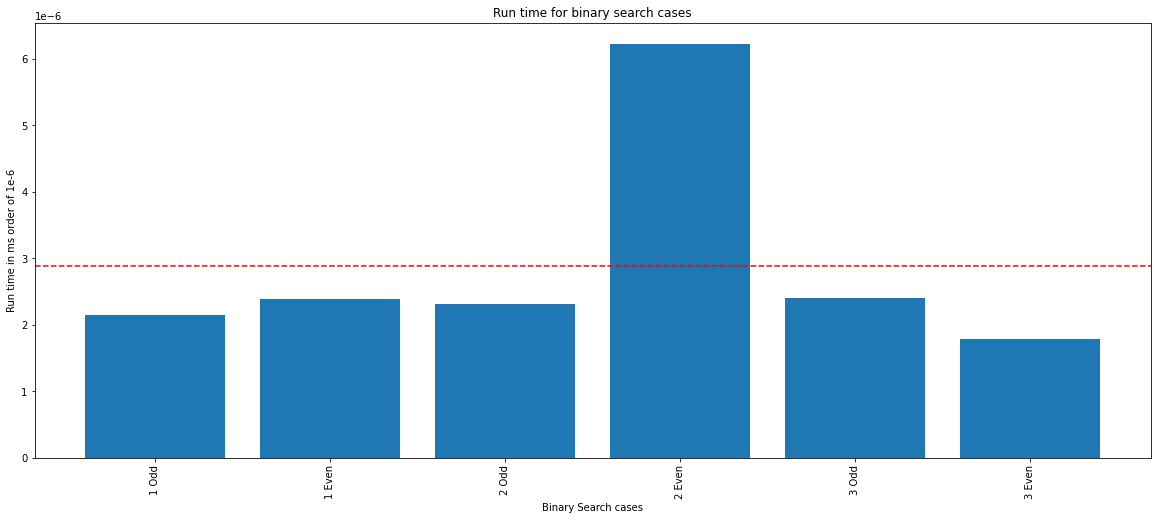

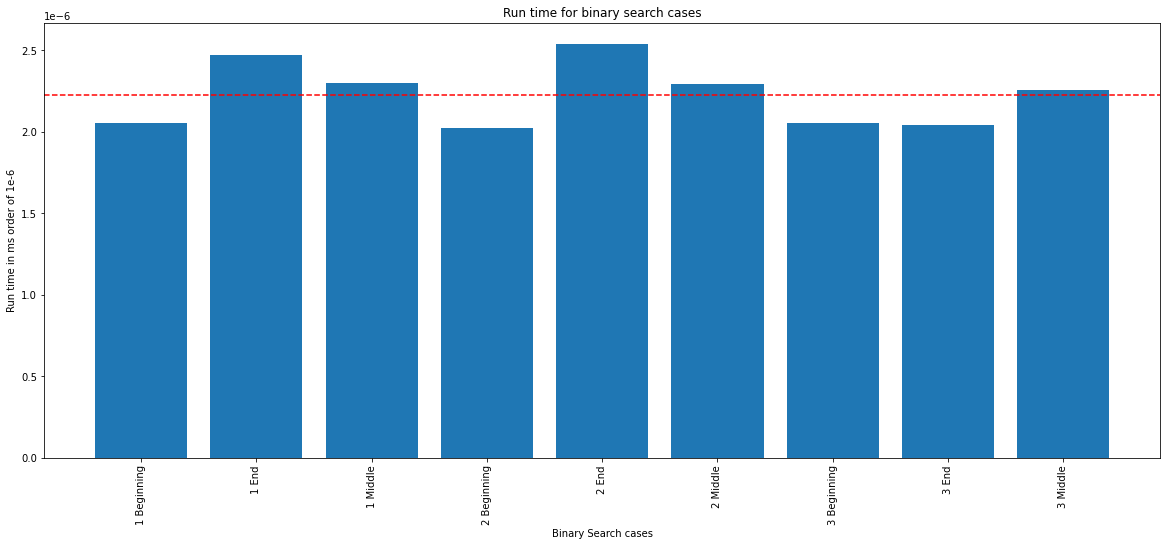

In [6]:
## you experiment code goes here

def generateOdd(n):
    if n % 2 == 0:
        n += 1
    return sorted([random.randint(1, 10000) for _ in range(n)])

def generateEven(n):
    if n % 2 == 1:
        n += 1 
    return sorted([random.randint(1, 100000) for _ in range(n)])

def measureTime(binarySearch, item_list, to_find):
    runs=75
    sum = 0
    for _ in range(runs):
        start = timeit.default_timer()
        binarySearch(item_list, to_find)
        stop=timeit.default_timer()
        sum += stop-start
    
    return sum/runs


list_size = 1000  #Should be over 1000
list=[random.randint(1, 100000) for _ in range(list_size)]
list.sort()
odd_even = {"Odd" : generateOdd(list_size), "Even" :generateEven(list_size)}
pos= {"Beginning": 0, "End": len(list) - 1, "Middle": list_size // 2}
binarySearch = [binary_search_1, binary_search_2, binary_search_3]
run_times_oddeven=[]
run_times_pos=[]
labelOddEven=[]
labelPos=[]

for func in binarySearch:
    for i in odd_even:
        labelOddEven.append(func.__name__[-1] + " " + i)
        l=odd_even.get(i)
        run_time = measureTime(func, l, l[random.randint(0,len(l))])
        run_times_oddeven.append(run_time)
  
for func in binarySearch:
    for i in pos:
        labelPos.append(func.__name__[-1] + " " + i)
        run_time = measureTime(func, list, list[pos.get(i)])
        run_times_pos.append(run_time)

show_plot(labelOddEven,run_times_oddeven)
show_plot(labelPos,run_times_pos)

**Reflection**:

---
First Bar Graph :
Each bar represents the average time taken for 75 runs (user can change the number of runs) in each case:
1. The first bar displays the average time taken when using `binary_search_1` on an odd-length list.
2. The second bar displays the average time taken when using `binary_search_1` on an even-length list.
3. The third bar displays the average time taken when using `binary_search_2` on an odd-length list.
4. The fourth bar displays the average time taken when using `binary_search_2` on an even-length list.
5. The fifth bar displays the average time taken when using `binary_search_3` on an odd-length list.
6. The sixth bar displays the average time taken when using `binary_search_3` on an even-length list.

    Experiment Outline :
        1. Generate Lists: Use the functions 'generateOdd' and 'generateEven' to create sorted lists of odd and even lengths containing at least 1000 integers each.
        2. Measure Execution Time: Employ the 'measureTime' function to obtain the average runtime in multiple runs (75 times in this experiment but can be adjusted) for each case.
        3. Data Collection: Store the average run times for each case in a list named 'run_times_oddeven'.

    Plotting Outline :
        1. Preparing Data: Use the list 'run_times_oddeven' to store the corresponding run times with a list of labels named 'labelOddEven,' indicating which binary search implementation is used (by number) and whether the length is even or odd.
        2. Plotting Function: Implement a function 'show_plot' that takes labels and run times as input and generates a bar plot.
        3. Plotting Execution: Iterate through the binary search functions and list types to collect data and call the 'show_plot' function.
        
    Result :
        1. Using 'binary_search_2 with even-length list performed the fastest in general.
        2. Using 'binary_search_3 with even-length list performed the slowest, however the difference is small and it changes every time experiment runs.
        3. The result changes slightly every time which shows the fastest algorithms varies by list generated since list is generated randomly every time it runs.
    

Second Bar Graph :
Each bar represents the average time taken for 75 runs (user can change the number of runs) in each case:
1. The first bar shows the average time taken when using `binary_search_1` to find the item at the beginning of the list.
2. The second bar shows the average time taken when using `binary_search_1` to find the item at the end of the list.
3. The third bar shows the average time taken when using `binary_search_1` to find the item in the middle of the list.
4. The fourth bar shows the average time taken when using `binary_search_2` to find the item at the beginning of the list.
5. The fifth bar shows the average time taken when using `binary_search_2` to find the item at the end of the list.
6. The sixth bar shows the average time taken when using `binary_search_2` to find the item in the middle of the list.
7. The seventh bar shows the average time taken when using `binary_search_3` to find the item at the beginning of the list.
8. The eighth bar shows the average time taken when using `binary_search_3` to find the item at the end of the list.
9. The ninth bar shows the average time taken when using `binary_search_3` to find the item in the middle of the list.

    Experiment Outline :
        1. Generate Lists: Create a sorted list named 'list' using random to generate a list of random integers of length 1000 (length can be adjusted by changing the variable 'list_size').
        2. Measure Execution Time: Use the 'measureTime' function to obtain the average runtime in multiple runs (75 times in this experiment but can be adjusted) for each case.
        3. Data Collection: Store the average run times for each case in a list named 'run_times_pos'.

    Plotting Outline :
        1. Preparing Data: Use the list 'run_times_pos' to store the corresponding run times with a list of labels named 'labelPos,' indicating which binary search implementation is used (by number) and the position of the item being searched.
        2. Plotting Function: Implement a function 'show_plot' that takes labels and run times as input and generates a bar plot.
        3. Plotting Execution: Iterate through the binary search functions and list types to collect data and call the 'show_plot' function.
        
    Result :
        1. Using 'binary_search_2 when searching the item at the beginning of the list performed the fastest.
        2. Using 'binary_search_2 when searching the item at the end of the list performed the slowest in general.
        3. The result changes slightly every time which shows the fastest algorithms varies by list generated since lists is generated randomly every time it runs.
---

### Part C

Recall that I discussed in the class, the possibility of "reducing the comparisons" in Binary Search implementation. One solution came up is to remove the comparison with "mid". If you design an experiment to test this, you will soon realize that while this speeds up the execution time by reducing the number of comparisons needed, it fails when the element to be searched is right in the middle.  So are there any ways to improve the speed of Binary Search that is not dependent on data? The answer is recursion! In this section, implement a Binary Search recursively.

In [7]:
def binary_search_4(item_list, to_find,lower,upper):

    if lower > upper:
        return False

    mid = (lower + upper) // 2

    if item_list[mid] == to_find:
        return True
    elif item_list[mid] < to_find:
        return binary_search_4(item_list, to_find, mid + 1, upper)
    else:
        return binary_search_4(item_list, to_find, lower, mid - 1)

Run all the experiments in Part B comapring all 4 implementations under all 6 cases. Plot the timings, and describe the results in the below section. Write a short description of your observation; why is recursion better in this case?

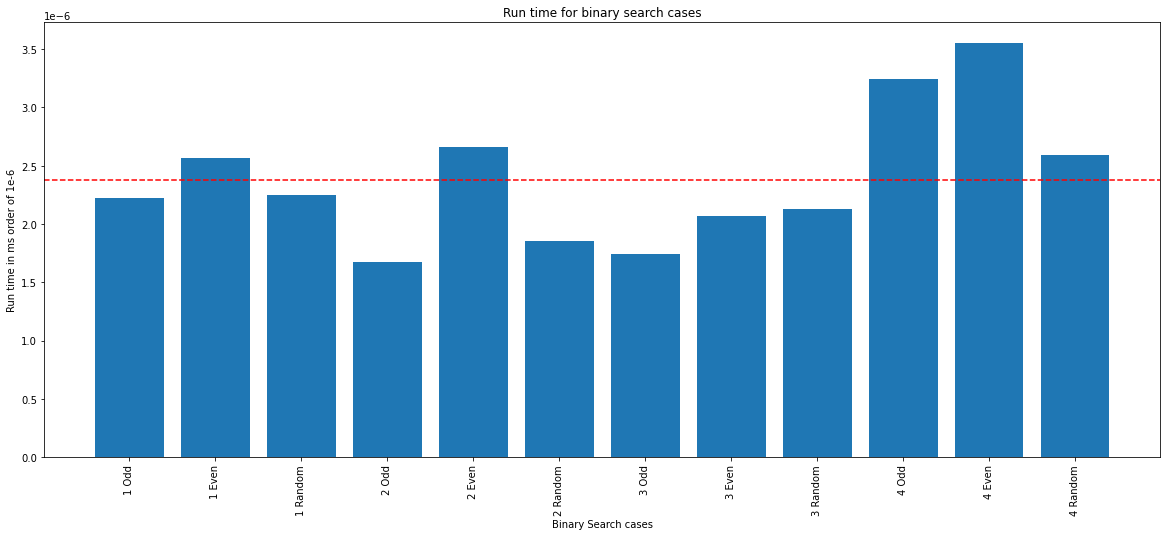

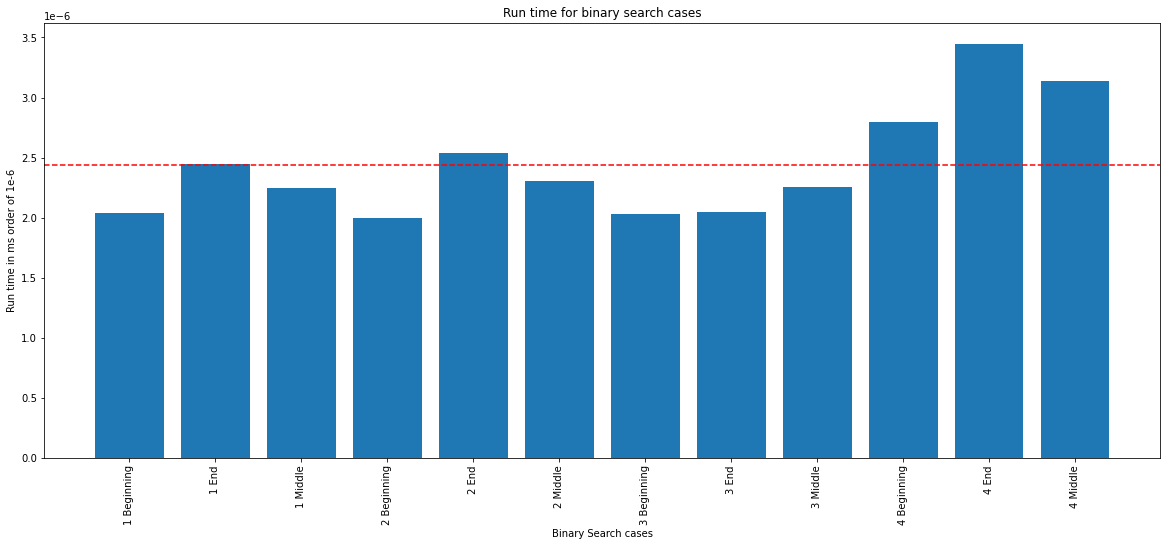

In [28]:
## you experiment code goes here

def measureTime_rec(item_list, to_find):
    runs=75
    sum = 0
    for _ in range(runs):
        start = timeit.default_timer()
        binary_search_4(item_list, to_find,0,len(item_list)-1)
        stop=timeit.default_timer()
        sum += stop-start
    
    return sum/runs


list_size = 1000  #Should be over 1000
list=[random.randint(1, 100000) for _ in range(list_size)]
list.sort()
odd_even_random = {"Odd" : generateOdd(list_size), "Even" :generateEven(list_size), "Random":list}
pos= {"Beginning": 0, "End": len(list) - 1, "Middle": list_size // 2 }
binarySearch = [binary_search_1, binary_search_2, binary_search_3, binary_search_4]
run_times_oddevenrandom=[]
run_times_pos=[]
labelOddEvenRandom=[]
labelPos=[]

for func in binarySearch:
    for i in odd_even_random:
        labelOddEvenRandom.append(func.__name__[-1] + " " + i)
        l=odd_even_random.get(i)
        ind = random.randint(0,len(l))
        if func.__name__=="binary_search_4":
            run_time = measureTime_rec(l, l[ind])
        else:
            run_time = measureTime(func, l, l[ind])
        run_times_oddevenrandom.append(run_time)
        
for func in binarySearch:
    for i in pos:
        labelPos.append(func.__name__[-1] + " " + i)
        if func.__name__=="binary_search_4":
            run_time = measureTime_rec(list, list[pos.get(i)])
        else:
            run_time = measureTime(func, list, list[pos.get(i)])
        run_times_pos.append(run_time)

show_plot(labelOddEvenRandom,run_times_oddevenrandom)
show_plot(labelPos,run_times_pos)

##### Result Discussion:

---
First Bar Graph : 
Each bar represents the average time taken for 75 runs (user can change the number of runs) in each case:
1. The first bar shows the average time taken when using `binary_search_1` on an odd-length list.
2. The second bar shows the average time taken when using `binary_search_1` on an even-length list.
3. The third bar shows the average time taken when using `binary_search_1` on an random list.
4. The fourth bar shows the average time taken when using `binary_search_2` on an odd-length list.
5. The fifth bar shows the average time taken when using `binary_search_2` on an even-length list.
6. The sixth bar shows the average time taken when using `binary_search_2` on an random list.
7. The seventh bar shows the average time taken when using `binary_search_3` on an odd-length list.
8. The eighth bar shows the average time taken when using `binary_search_3` on an even-length list.
9. The ninth bar shows the average time taken when using `binary_search_3` on an random list.
10. The tenth bar shows the average time taken when using `binary_search_4` on an odd-length list.
11. The eleventh bar shows the average time taken when using `binary_search_4` on an even-length list.
12. The twelfth bar shows the average time taken when using `binary_search_4` on an random list.

    Experiment Outline:
        1. Generate Lists: Use the functions 'generateOdd' and 'generateEven' to create sorted lists of odd and even lengths containing at least 1000 integers each. List named 'list' is a random sorted list of size 'list_size'
        2. Measure Execution Time: Use the function 'measureTime' to obtain the average runtime in multiple runs (75 times in my experiment but can be adjusted) for each case for binary_search 1 to 3. Create the function called 'measureTime_rec' for binary_search_4 since it requires lower and upper parameters unlike the others.
        3. Data Collection: Store the average run times for each case in a list named 'run_times_oddevenrandom'.

    Plotting Outline:
        1. Preparing Data: Use the list 'run_times_oddevenrandom' to store the corresponding run times with a list of labels named 'labelOddEvenRandom,' which shows which binary search implementation is used (by number) and whether the length is even or odd or random.
        2. Plotting Function: Implement a function 'show_plot' that takes labels and run times as input and generates a bar plot.
        3. Plotting Execution: Loop through the binary search functions and list types to collect data and call the 'show_plot' function.
        
    Result :
        1. The fastest and slowest cases changes every time it runs since lists is generated randomly every time it runs.
        2. Using 'binary_search_4' which implemented recursion, generally takes the longest.

Second Bar Graph : 
Each bar represents the average time taken for 75 runs (user can change the number of runs) in each case:
1. The first bar shows the average time taken when using `binary_search_1` to find the item at the beginning of the list.
2. The second bar shows the average time taken when using `binary_search_1` to find the item at the end of the list.
3. The third bar shows the average time taken when using `binary_search_1` to find the item in the middle of the list.
4. The fourth bar shows the average time taken when using `binary_search_2` to find the item at the beginning of the list.
5. The fifth bar shows the average time taken when using `binary_search_2` to find the item at the end of the list.
6. The sixth bar shows the average time taken when using `binary_search_2` to find the item in the middle of the list.
7. The seventh bar shows the average time taken when using `binary_search_3` to find the item at the beginning of the list.
8. The eighth bar shows the average time taken when using `binary_search_3` to find the item at the end of the list.
9. The ninth bar shows the average time taken when using `binary_search_3` to find the item in the middle of the list.
10. The tenth bar shows the average time taken when using `binary_search_4` to find the item at the beginning of the list.
11. The eleventh bar shows the average time taken when using `binary_search_4` to find the item at the end of the list.
12. The twelfth bar shows the average time taken when using `binary_search_4` to find the item in the middle of the list.

    Experiment Outline:
        1. Generate Lists: Create a sorted list named 'list' using random to generate a list of random integers of length 1000 (length can be adjusted by changing the integer of the variable list_size).
        2. Measure Execution Time: Use the function 'measureTime' to obtain the average runtime in multiple runs (75 times in my experiment but can be adjusted) for each case. Create the function called 'measureTime_rec' for binary_search_4 since it requires lower and upper parameters unlike the others.
        3. Data Collection: Store the average run times for each case in a list named 'run_times_pos'.

    Plotting Outline:
        1. Preparing Data: Use the list 'run_times_pos' to store the corresponding run times with a list of labels named 'labelPos,' which shows which binary search implementation is used (by number) and the position of the item being searched.
        2. Plotting Function: Implement a function 'show_plot' that takes labels and run times as input and generates a bar plot.
        3. Plotting Execution: Loop through the binary search functions and list types to collect data and call the 'show_plot' function.
        
    Result :
        1. The fastest and slowest cases changes every time it runs since lists is generated randomly every time it runs.
        2. Using 'binary_search_4' which recursion is implemented, generally takes the longest.

---

### PART D

Now that you are comfortable in designing experiments, in this section, use the implementations of **Heap**, **Merge**, and **Quick** sort discussed in class and run suitable experiments to compare the runtimes of these three algorithms. 

Hint: it should become clear where Quick sort gets its name.

In [38]:
# your implementation and experiments go here.

import time
import random

def heapify(arr, n, i):
    largest = i
    left_child = 2 * i + 1
    right_child = 2 * i + 2

    if left_child < n and arr[i] < arr[left_child]:
        largest = left_child

    if right_child < n and arr[largest] < arr[right_child]:
        largest = right_child

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heapsort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

def merge(a, lo, mid, hi):
    i, j = lo, mid + 1
    aux = [0] * len(a)

    for k in range(lo, hi + 1):
        aux[k] = a[k]

    for k in range(lo, hi + 1):
        if i > mid:
            a[k] = aux[j]
            j = j + 1
        elif j > hi:
            a[k] = aux[i]
            i = i + 1
        elif aux[j] < aux[i]:
            a[k] = aux[j]
            j = j + 1
        else:
            a[k] = aux[i]
            i = i + 1

def mergesort_rec(a, lo, hi):
    if hi<=lo:
        return
    mid = lo + (hi-lo) // 2
    mergesort_rec(a, lo, mid)
    mergesort_rec(a, mid+1, hi)
    merge(a, lo, mid, hi)

def mergesort(a):
    mergesort_rec(a,0,len(a)-1)


def partition(array, low, high):
    swaps = 0
    pivot, ptr = array[high], low
    for i in range(low, high):
        if array[i] <= pivot:
            array[i], array[ptr] = array[ptr], array[i]
            ptr += 1
            swaps += 1
    array[ptr], array[high] = array[high], array[ptr]
    swaps += 1
    return ptr, swaps

def quicksort_rec(array, low, high):
    swaps = 0
    if low < high:
        ptr, swaps = partition(array, low, high)
        swaps += quicksort_rec(array, low, ptr - 1)
        swaps += quicksort_rec(array, ptr + 1, high)
    return swaps

def quicksort(array):
    return quicksort_rec(array, 0, len(array) - 1)

def heapsort_time(runs, batch_size, arr):
    run_times=[]
    for _ in range(runs):
        start= timeit.default_timer()
        heapsort(arr)
        stop=timeit.default_timer()
        run_times.append(stop-start)
    batches = [0.0] * (runs // batch_size)
    for i in range(runs):
        batches[i//batch_size] += run_times[i]
    for i in range(len(batches)):
        batches[i] /= batch_size
    draw_plot_batches(batches,runs,batch_size)
def mergesort_time(runs, batch_size, arr):
    run_times=[]
    for _ in range(runs):
        start= timeit.default_timer()
        mergesort(arr)
        stop=timeit.default_timer()
        run_times.append(stop-start)
    batches = [0.0] * (runs // batch_size)
    for i in range(runs):
        batches[i//batch_size] += run_times[i]
    for i in range(len(batches)):
        batches[i] /= batch_size
    draw_plot_batches(batches,runs,batch_size)
def quicksort_time(runs, batch_size, arr):
    run_times=[]
    for _ in range(runs):
        start= timeit.default_timer()
        quicksort(arr)
        stop=timeit.default_timer()
        run_times.append(stop-start)
    batches = [0.0] * (runs // batch_size)
    for i in range(runs):
        batches[i//batch_size] += run_times[i]
    for i in range(len(batches)):
        batches[i] /= batch_size
    draw_plot_batches(batches,runs, batch_size)

RUNS = 200

def run_tests (runs,batch_size,n):
    mylist = create_custom_list(n,n*2)

    heaplist = mylist.copy()
    heapsort_time(200, 20, heaplist)

    mergelist = mylist.copy()
    mergesort_time(200, 20, mergelist)

    quicklist = mylist.copy()
    quicksort_time(200, 20, quicklist)

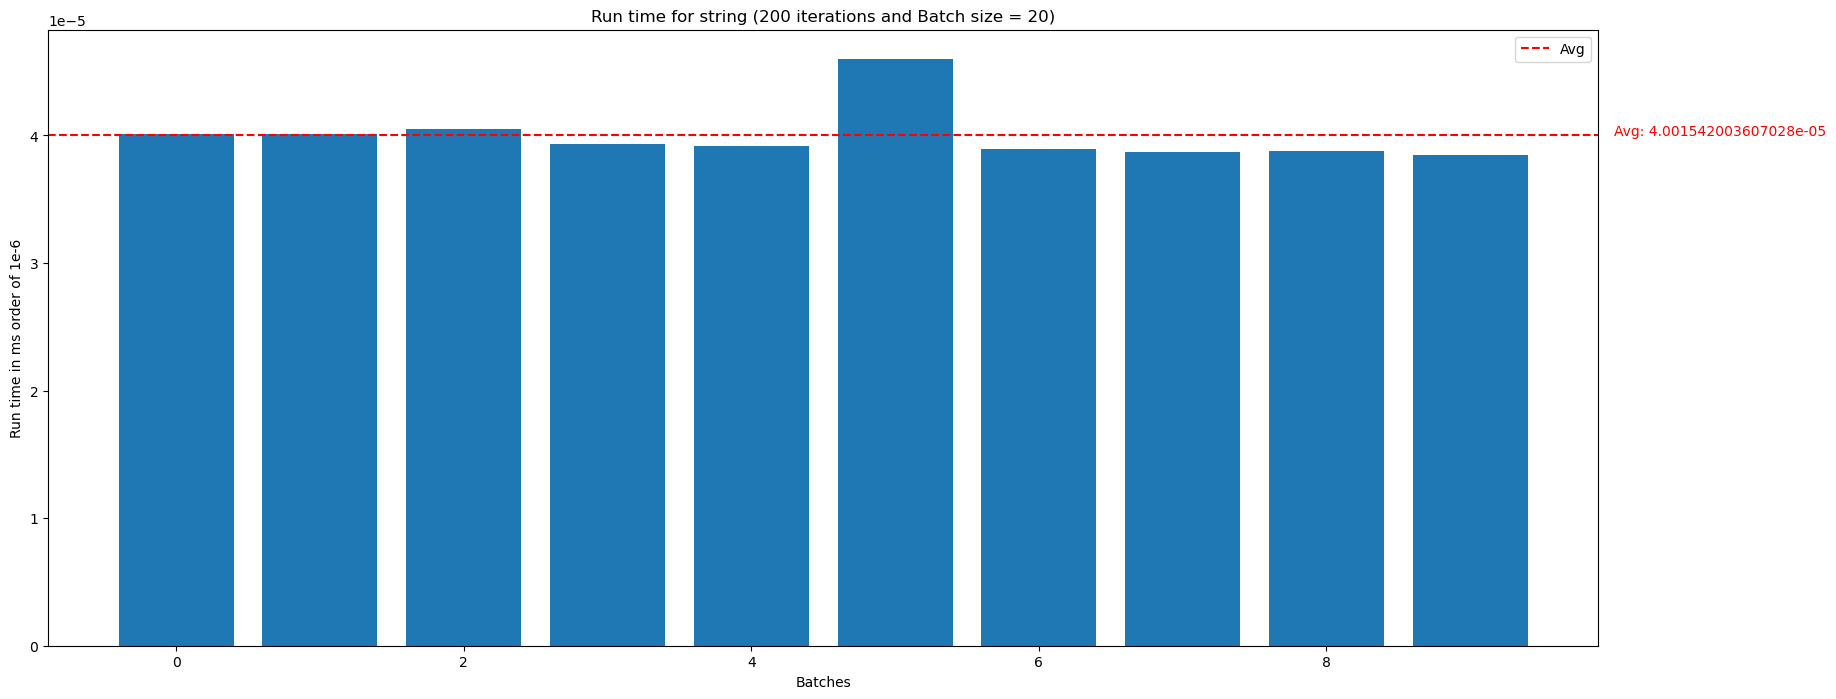

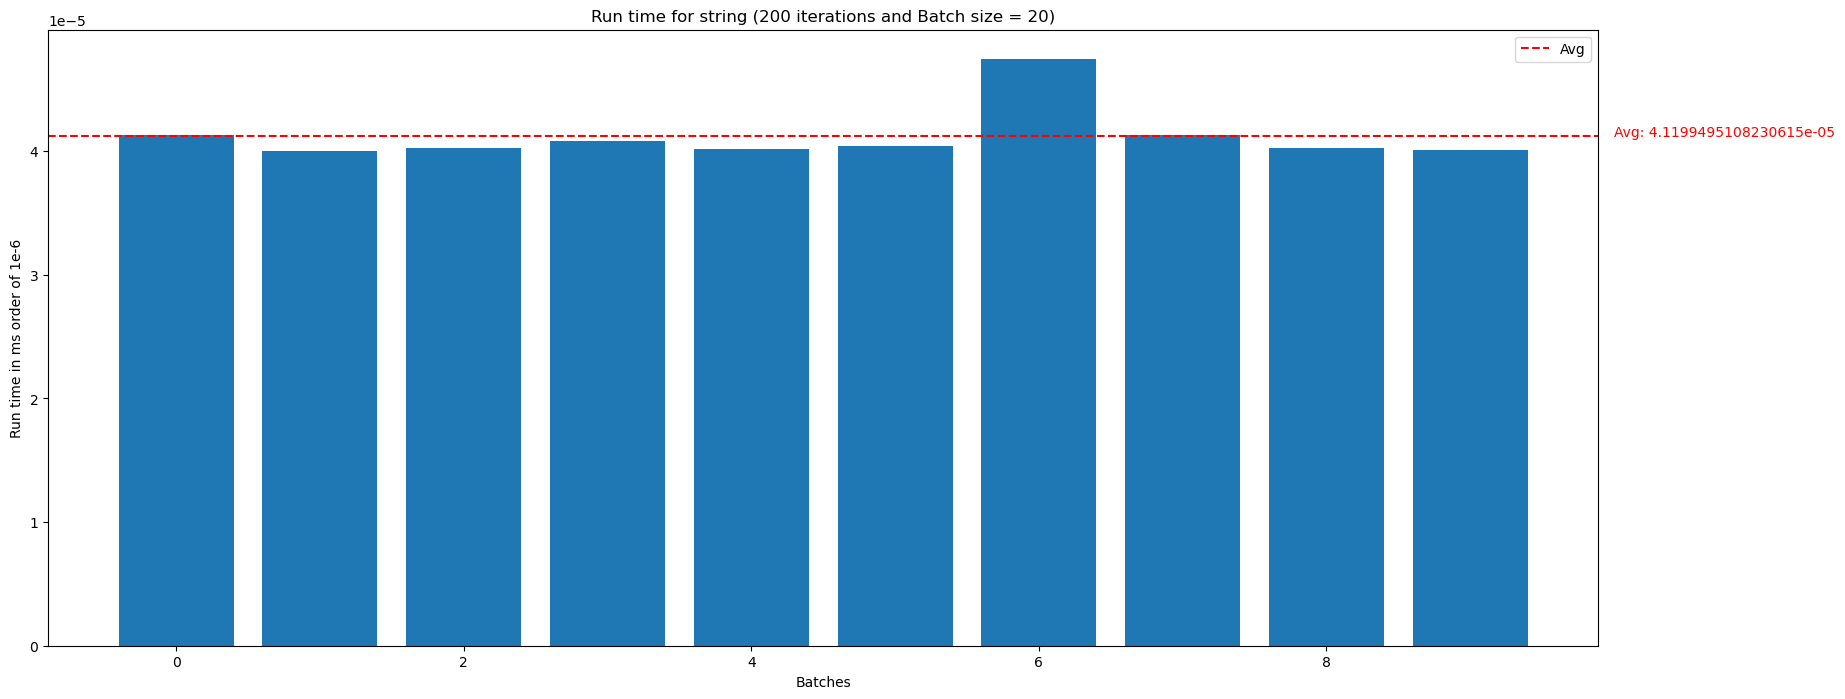

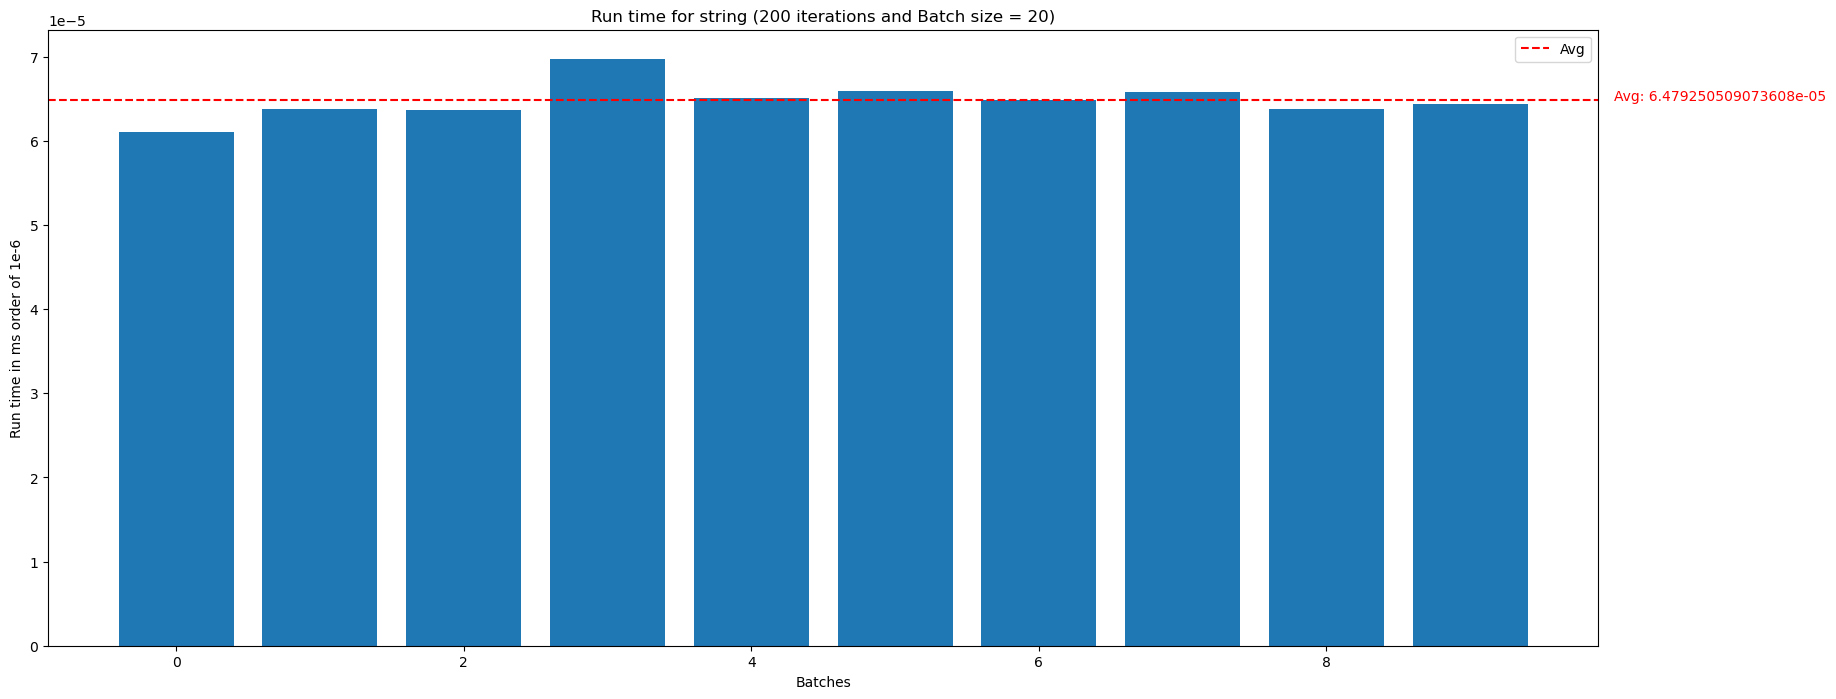

In [25]:
run_tests(RUNS, RUNS//10, 50)

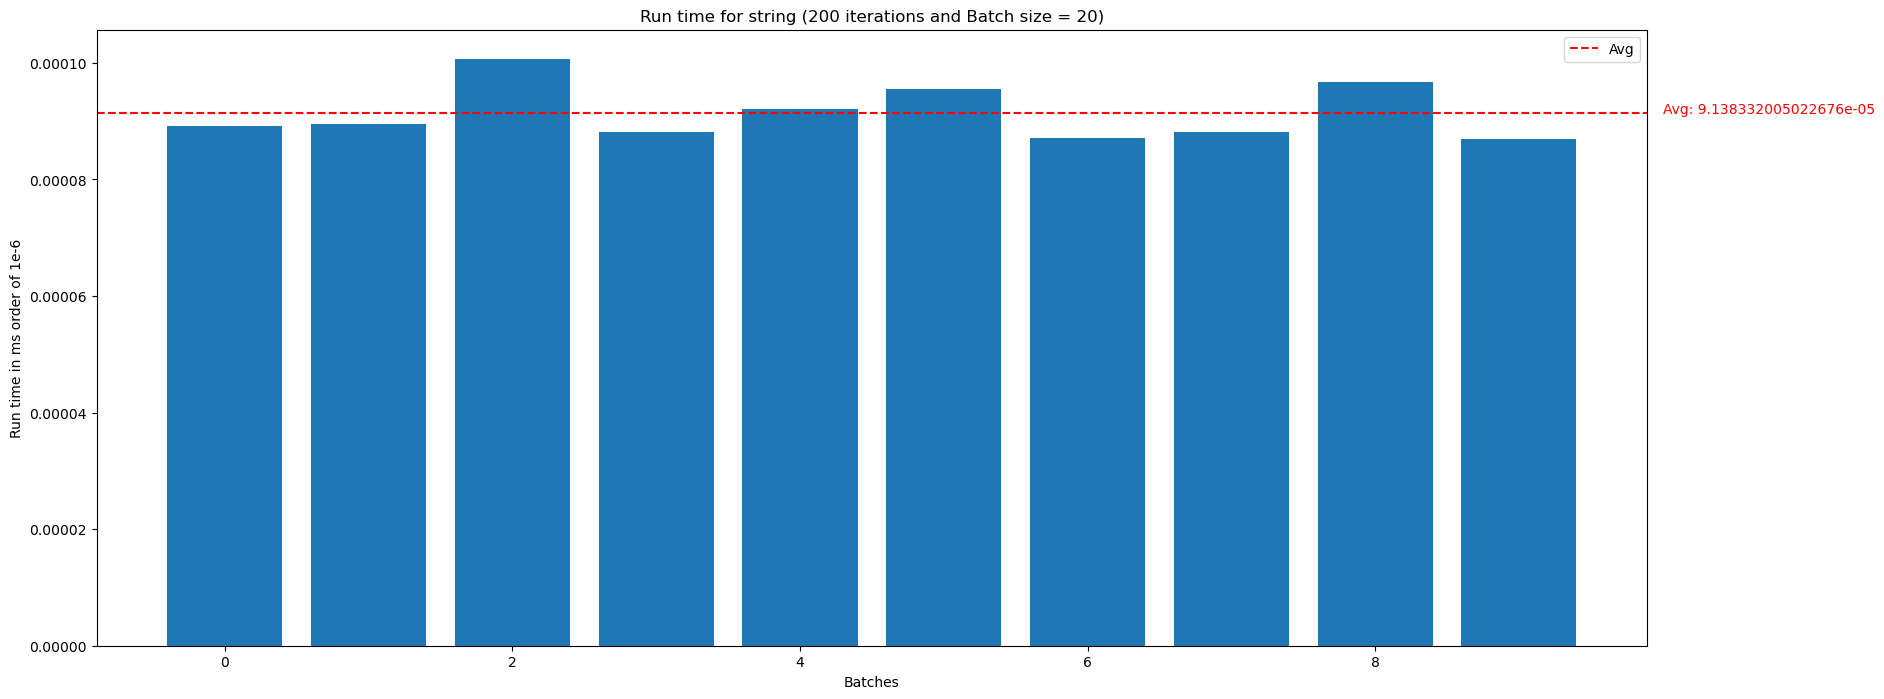

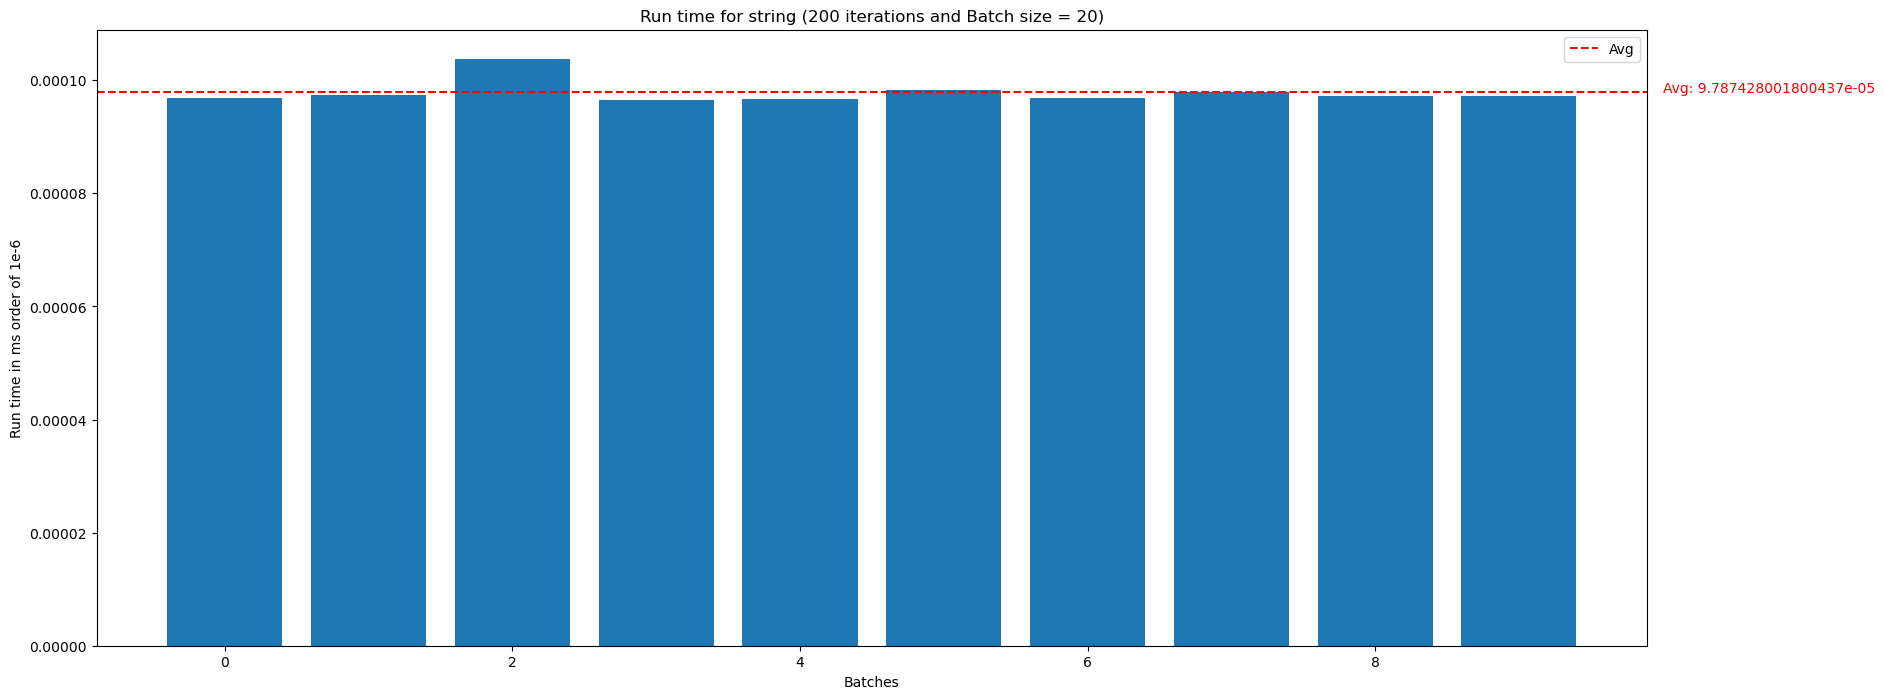

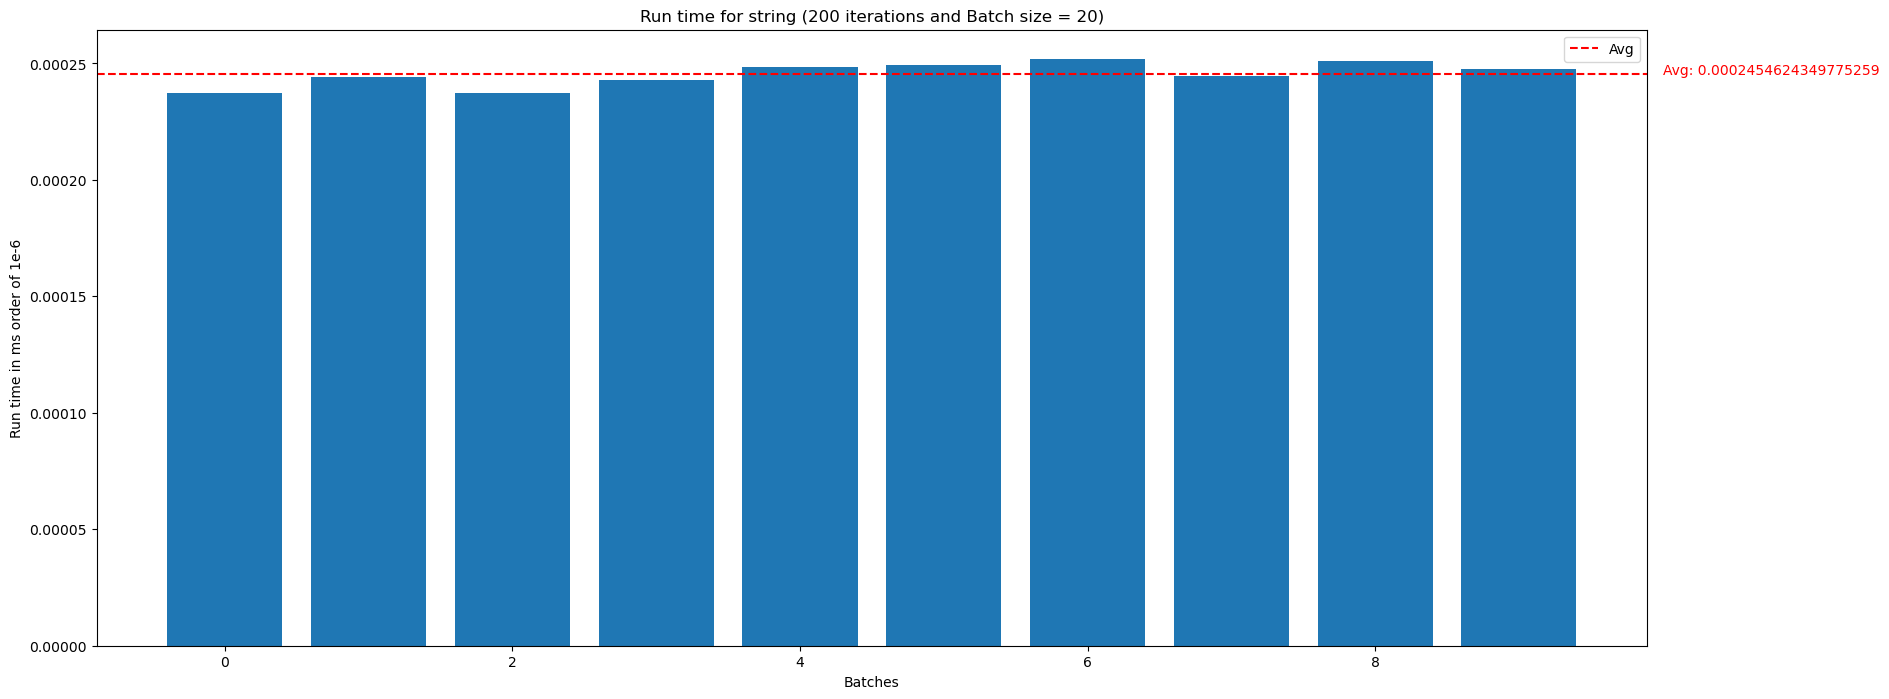

In [26]:
run_tests(RUNS, RUNS//10, 100)

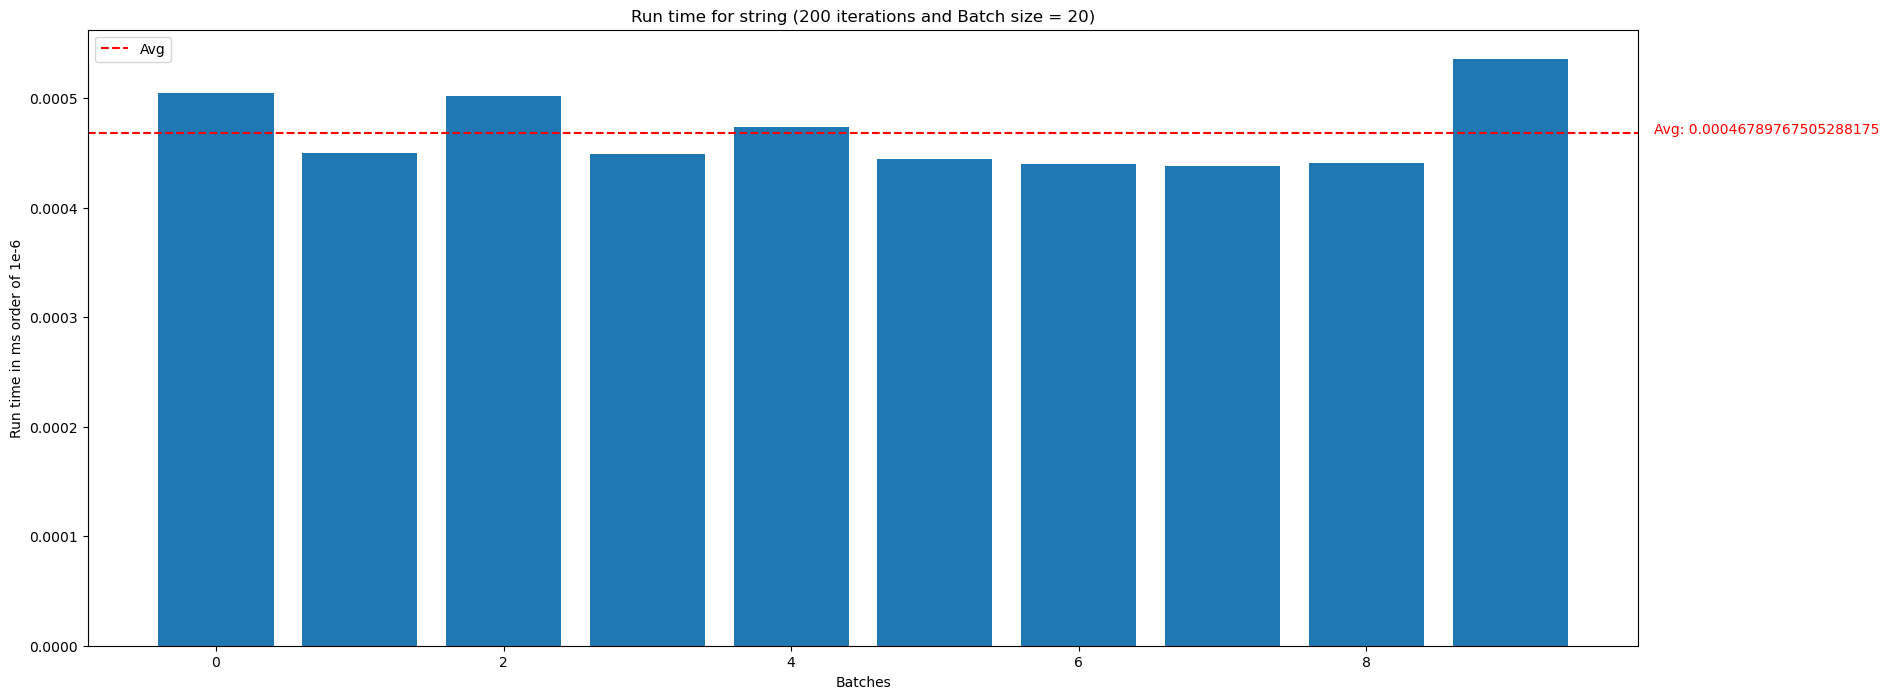

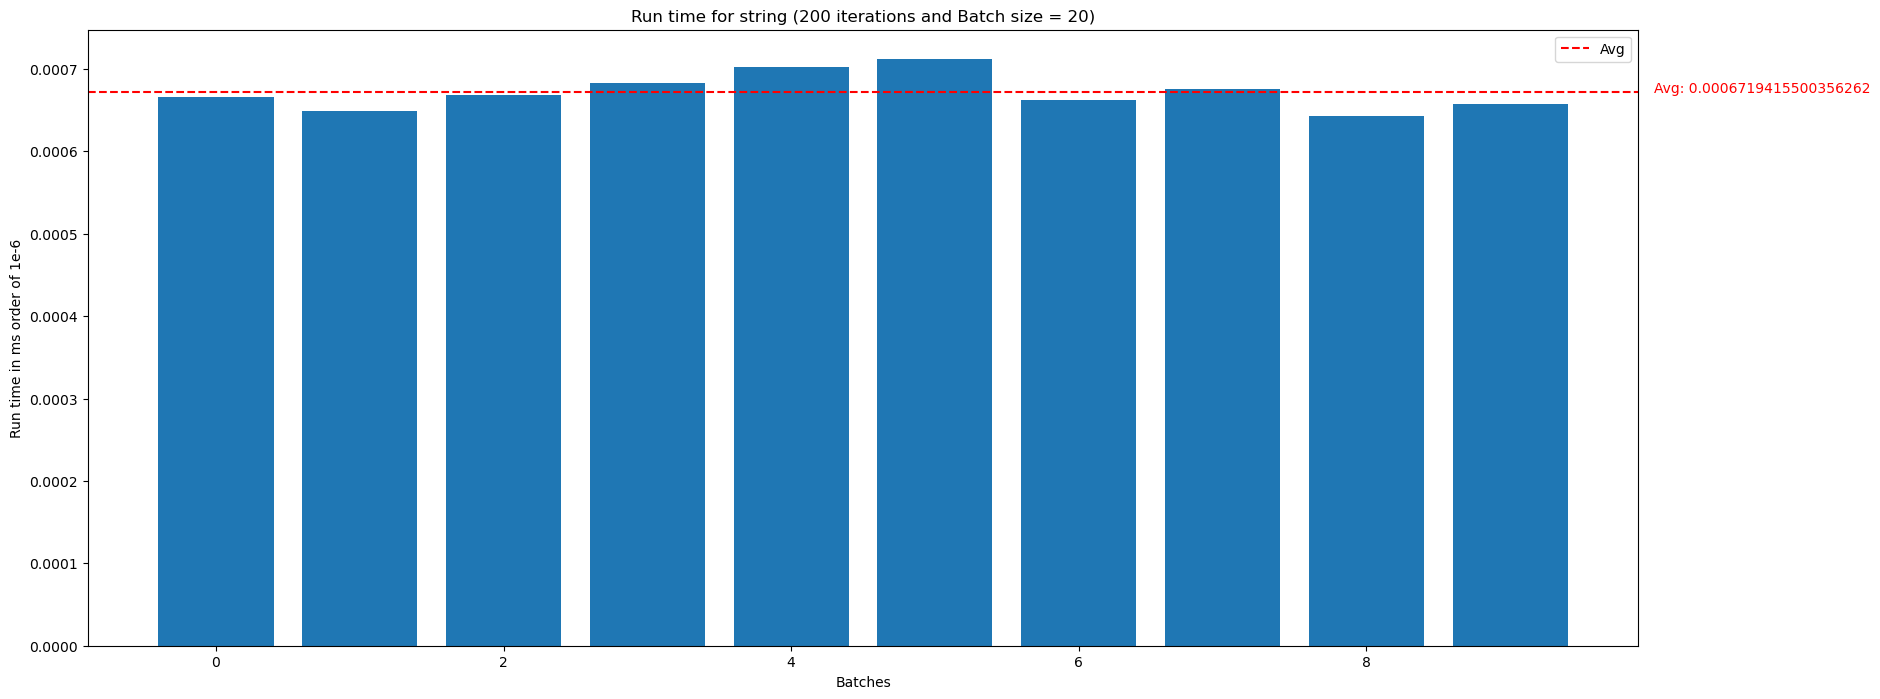

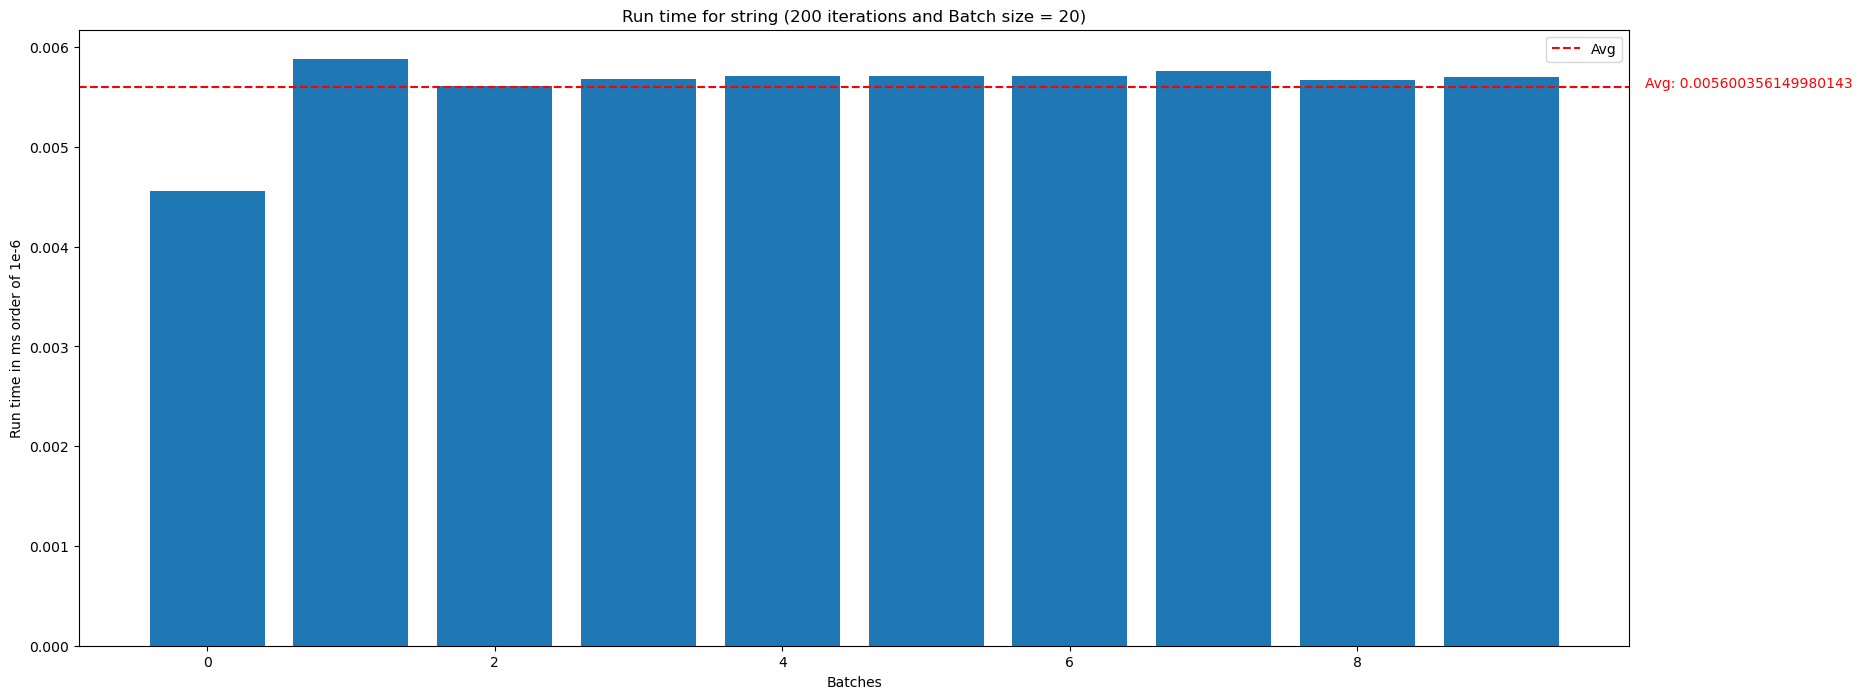

In [27]:
run_tests(RUNS, RUNS//10, 500)

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

In [ ]:
xs = [5,7,3,1,2,0,9]
heapsort(xs)

print(xs)

[0, 1, 2, 3, 5, 7, 9]


In [ ]:
xs = [5,7,3,1,2,0,9]
mergesort(xs)

print(xs)

[0, 1, 2, 3, 5, 7, 9]


In [ ]:
xs = [5,7,3,1,2,0,9]
quicksort(xs)

print(xs)

[0, 1, 2, 3, 5, 7, 9]


**Reflection**: Through an experiment, I compared Heap, Quick, and Merge (in that order) sorts through list sizes of 50, 100, and 500. The average times can be found above. It is worthy to mention that Quick sort is not actually quick mainly because recursive algorithms are considerably slower especially in Python. All experiments were batched and conducted using 200 runs, batch size of 20.

---
---

### PART E

E1. In previous experiments you also saw that not all algorithms are suitable for all scenarios. For instance, Merge Sort is better than Quick sort for certain situations. In this section, design a experiment to compare the scenarios where Merge Sort is better/worse than Quick Sort. You can use the traditional version of Merge Sort or use improved version ( maybe via recursion) to compare this performance.

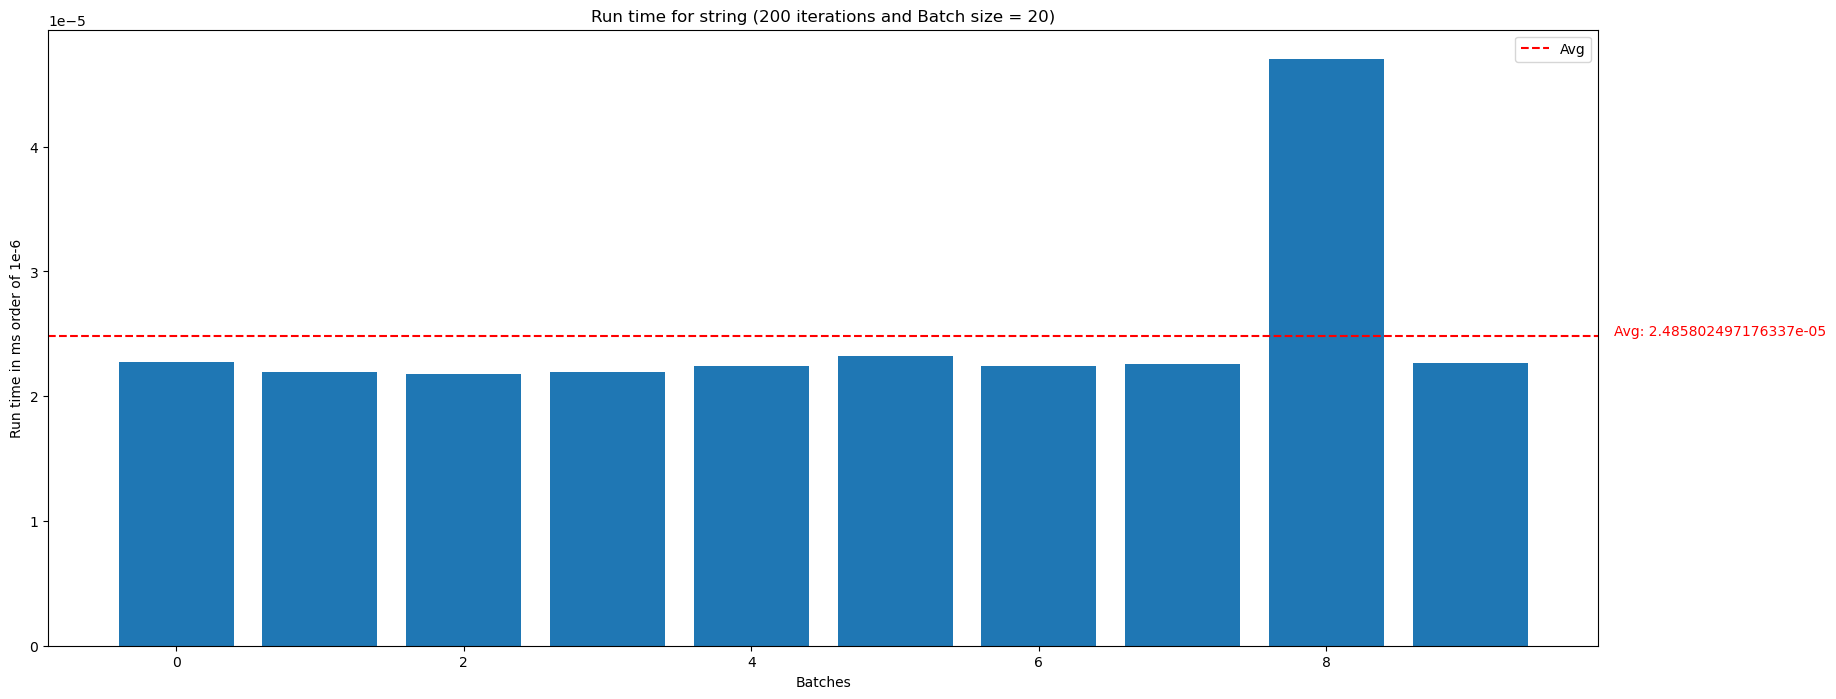

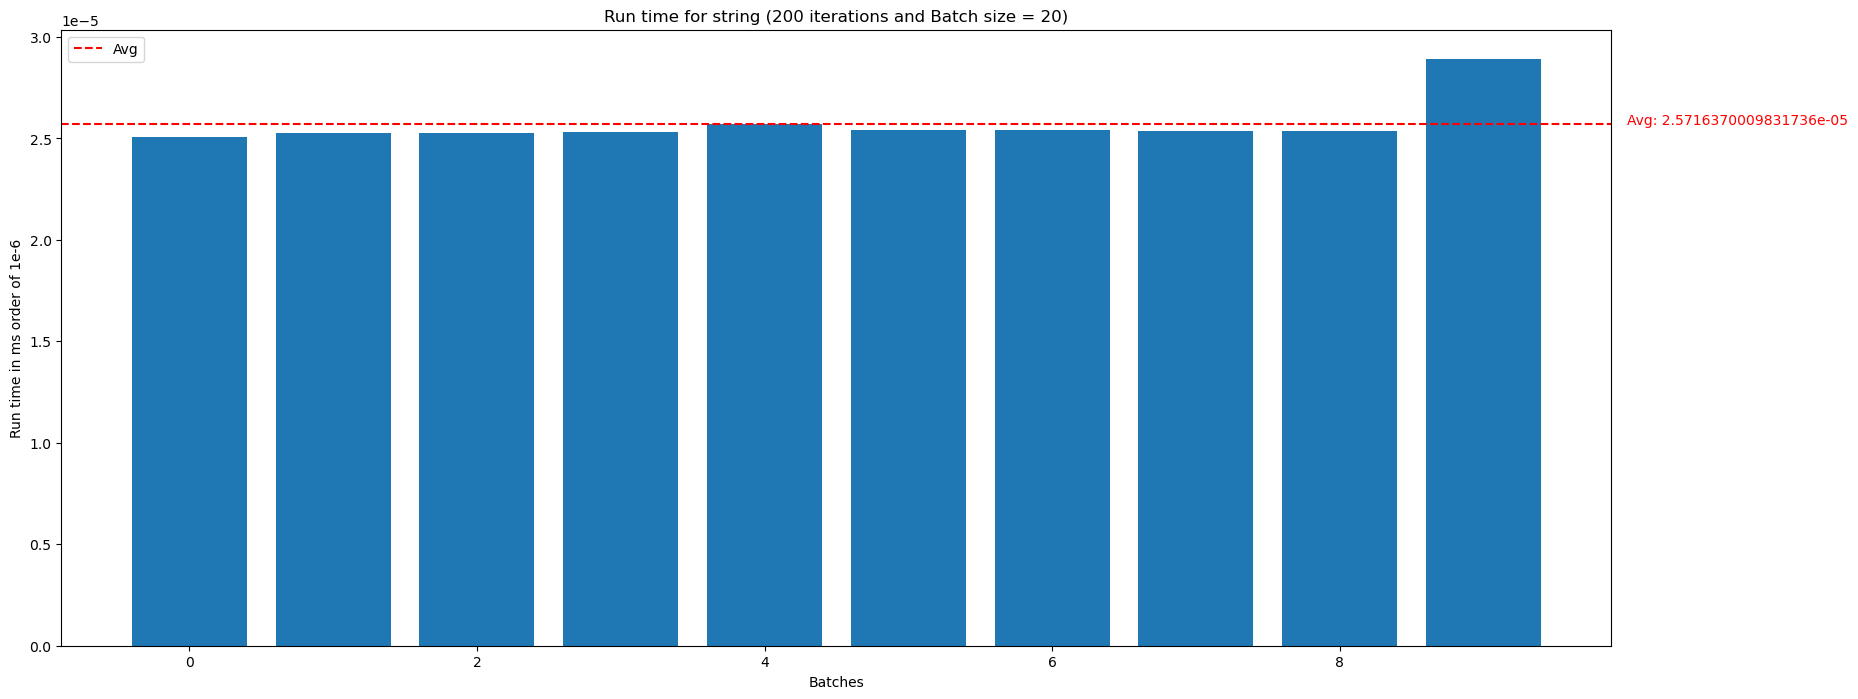

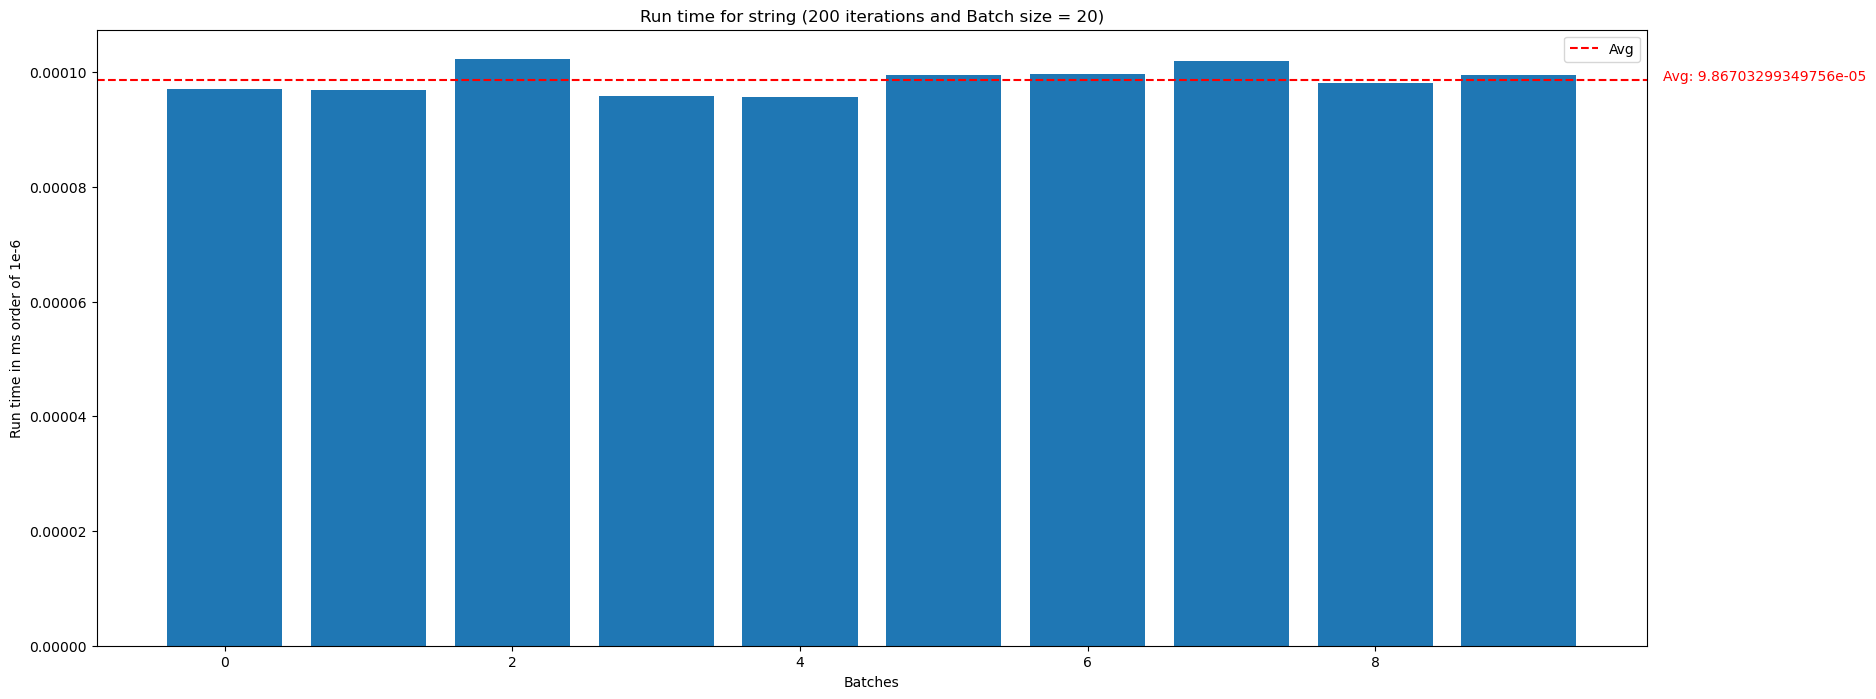

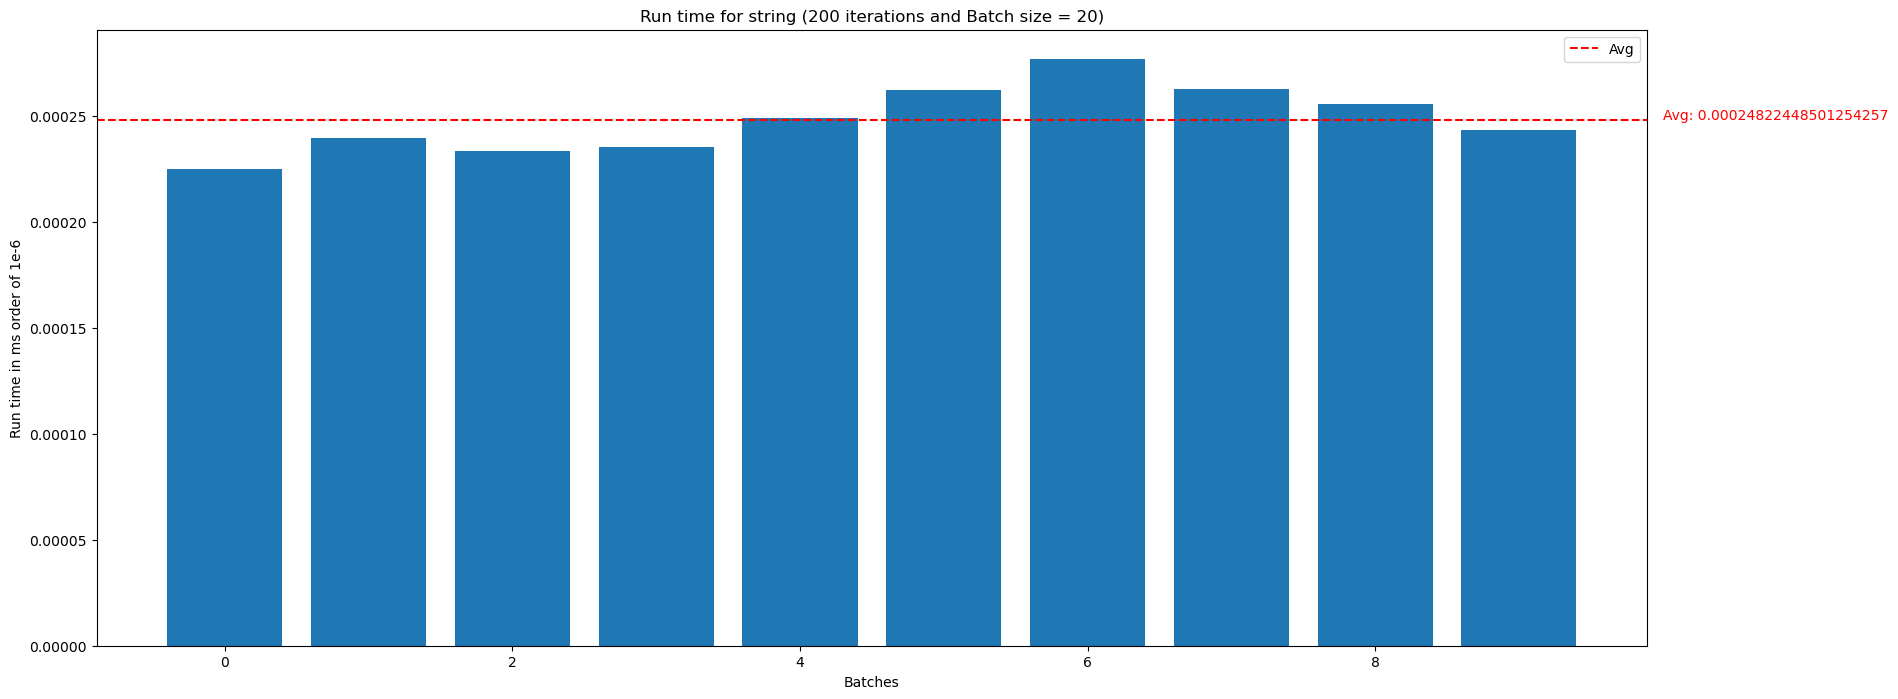

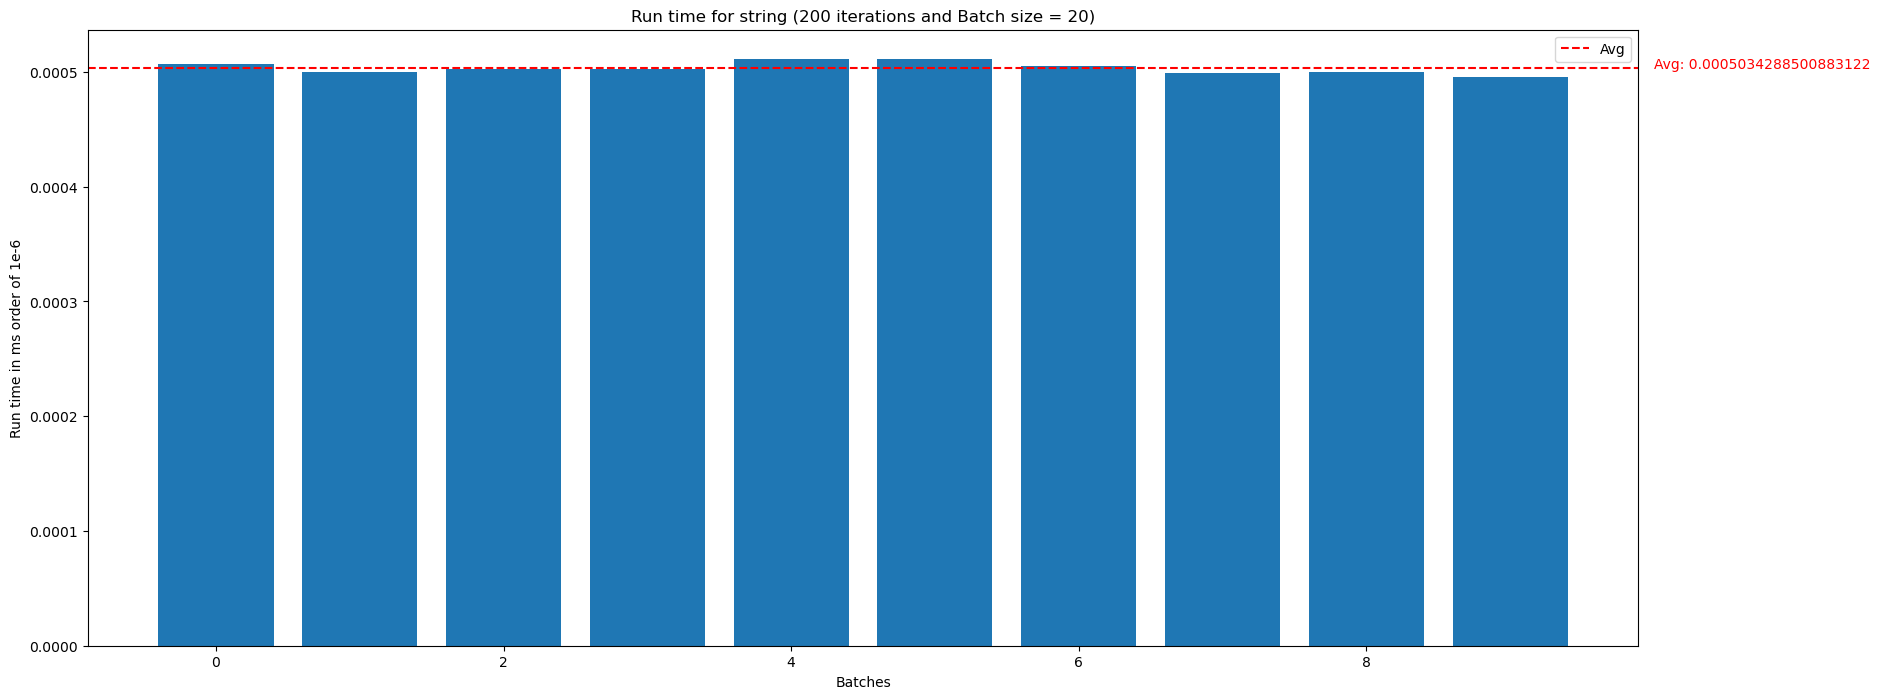

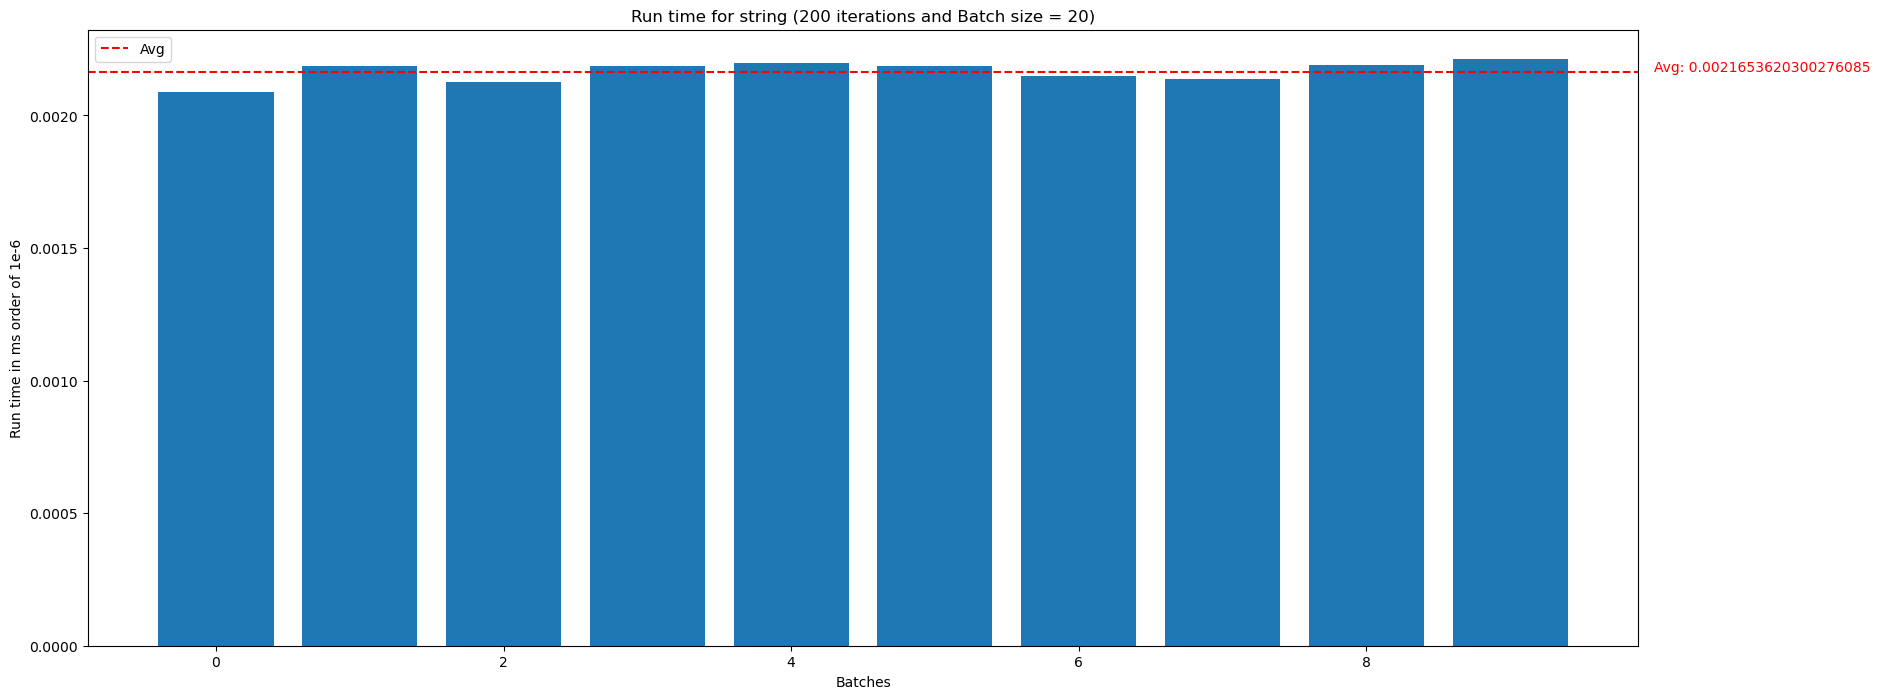

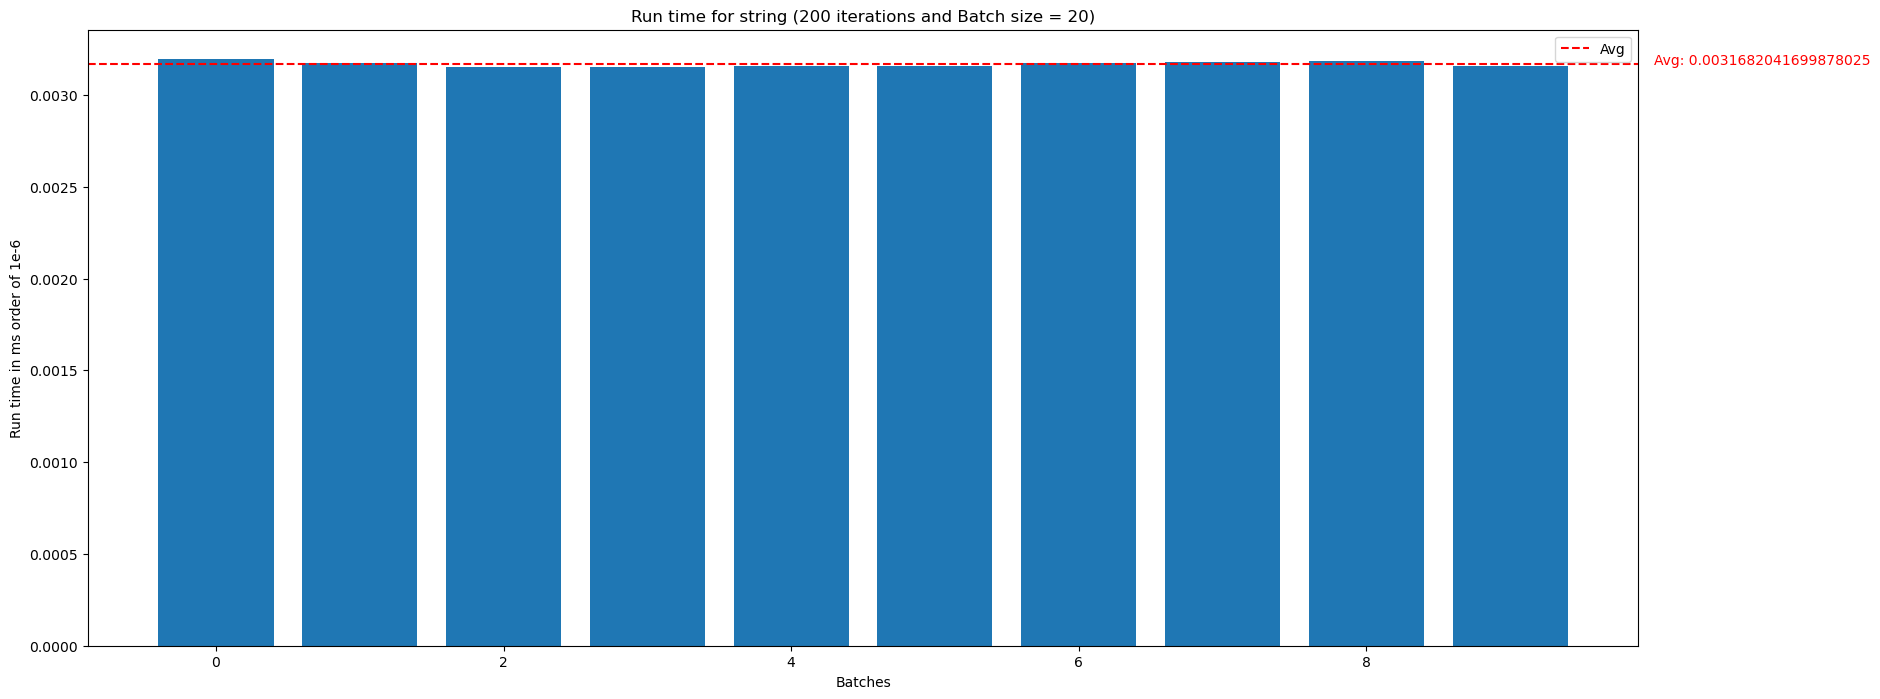

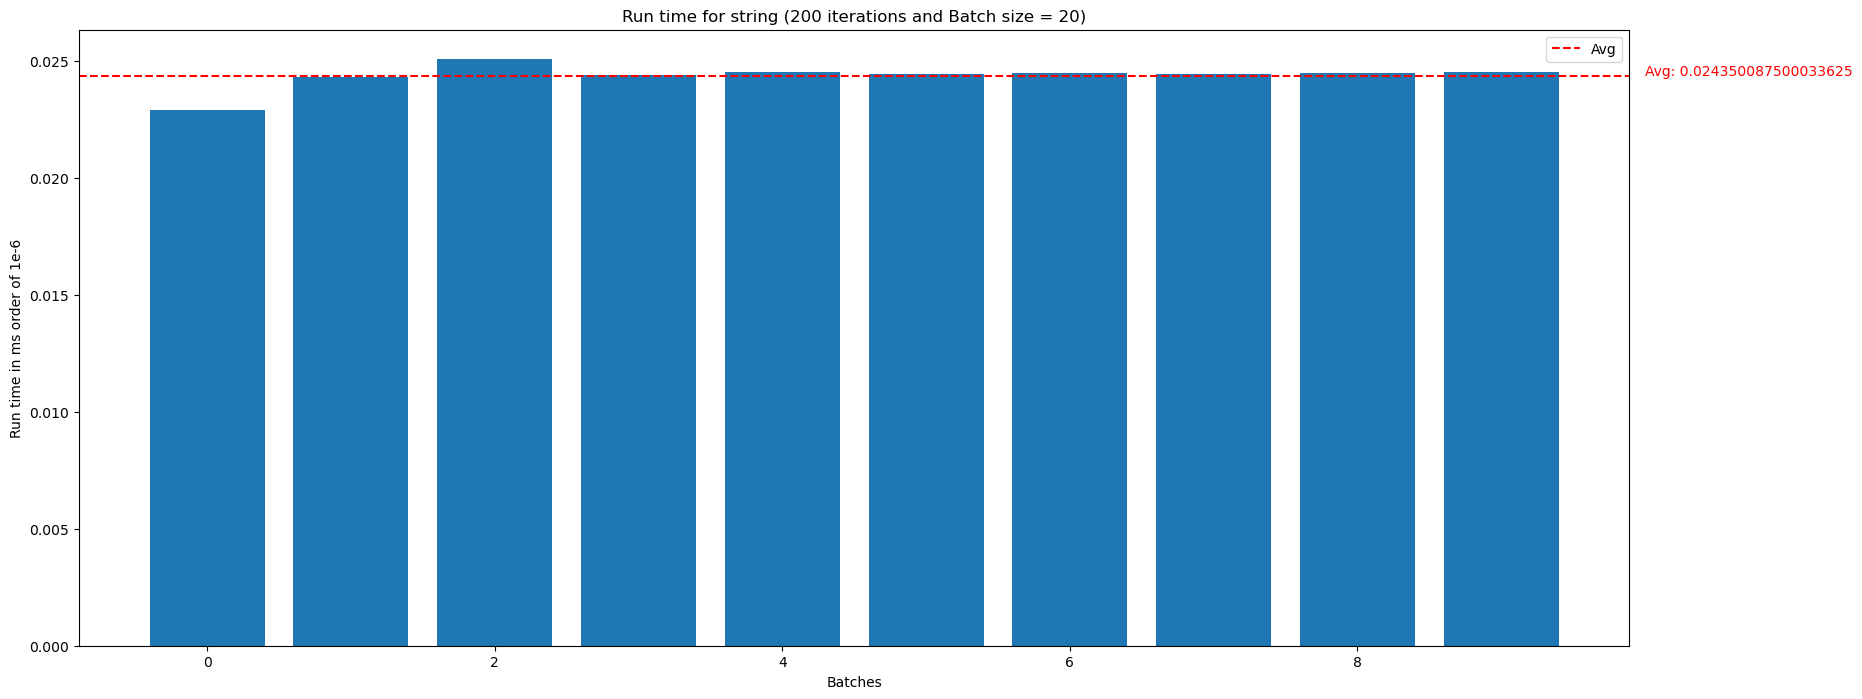

In [28]:
# your implementation and experiments go here.
RUNS = 200
for i in range(3,7):
    listlength = int(10**(i/2))
    mylist = create_custom_list(listlength,listlength*2)
    mergelist = mylist.copy()
    mergesort_time(RUNS, RUNS//10, mergelist)

    quicklist = mylist.copy()
    quicksort_time(RUNS, RUNS//10, quicklist)

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

**Reflection**: Through an experiment, I compared Merge and Quick sorts through list sizes of int(10**(i/2)), where 3<= i < 7. Surprisingly enough, Quicksort is worse than Merge sort although it displayed similar behavior to it for small lists, indicating that Quicksort is better for smalller data. Again, I used a run count of 200 with batch size of 20.

---

E2. Recall that on the first day of class I asked which two algorithms have similar complexity - Merge Sort and Quick Sort under (O(nlogn)) are likely to perform similar under average cases. However, under worst case, the complexity of quick sort is much worse (O(n^2). Design an experiment to show this behavior. Plot this behavior on a bar/line chart. 

Next, count the number of "swaps" after which Quick sort starts behaving comparable to Merge sort. 

HINT: This will be a threshold at which the quick sort algorithm picks up again.


In [55]:
## your implementation and code goes here

listlength = 50
runs = 100

unsortedlist = create_custom_list(listlength,10000)

sortedlist= unsortedlist.copy()

bestcaseswaps = quicksort(sortedlist)
sortedlist.reverse()

halfsortedlist = sortedlist.copy()
# replace half of sorted list with unsorted list (avg case)
halfsortedlist[len(halfsortedlist)//2:len(halfsortedlist)] = unsortedlist[len(halfsortedlist)//2:len(halfsortedlist)]

avgcaseswaps = quicksort(halfsortedlist.copy())
worstcaseswaps = quicksort(sortedlist.copy())

print(bestcaseswaps)
print(avgcaseswaps)
print(worstcaseswaps)


136
147
649


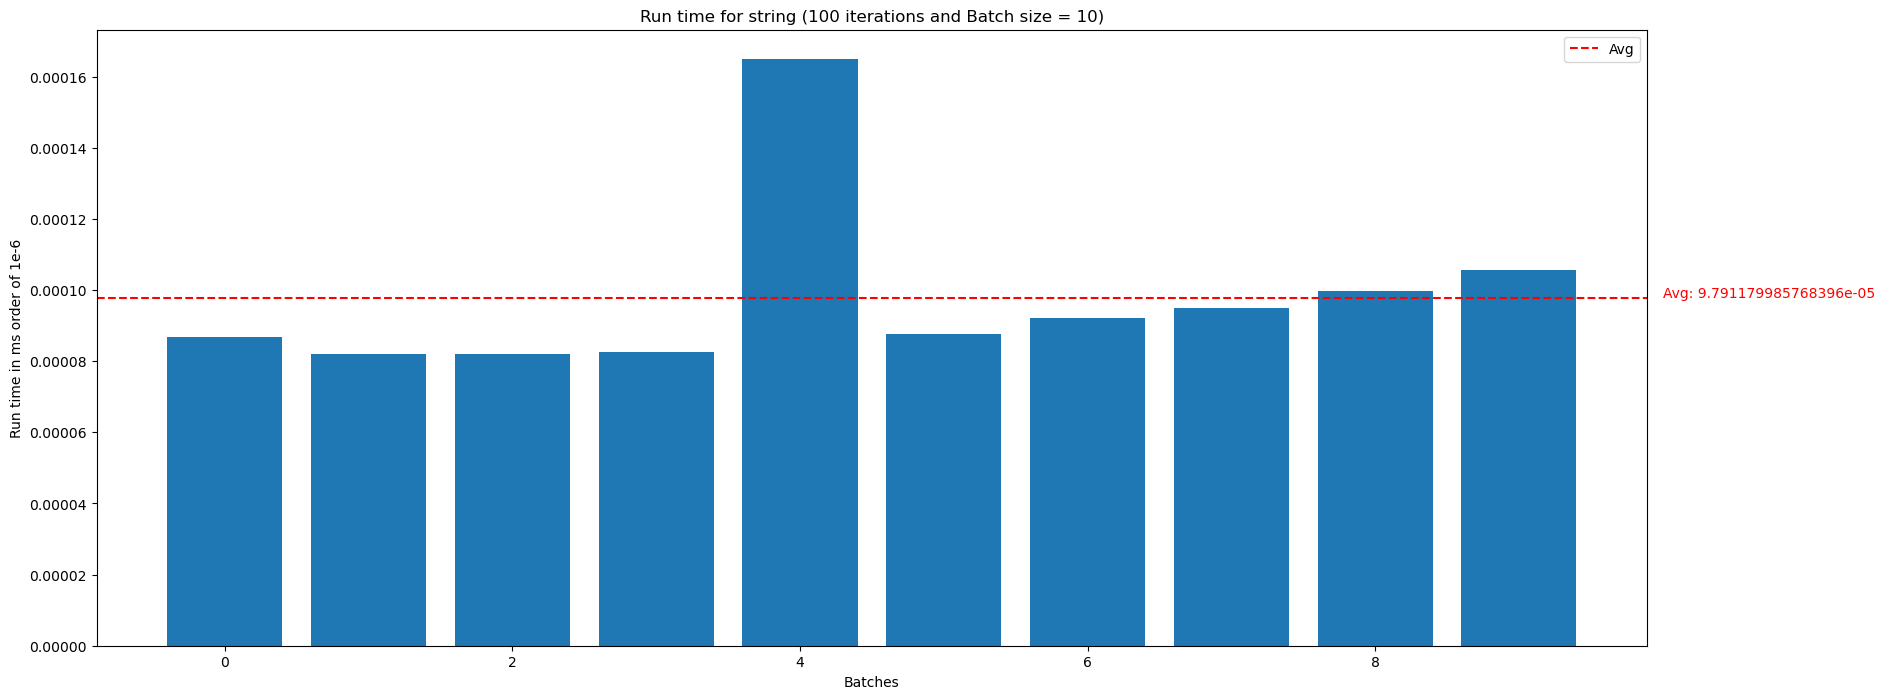

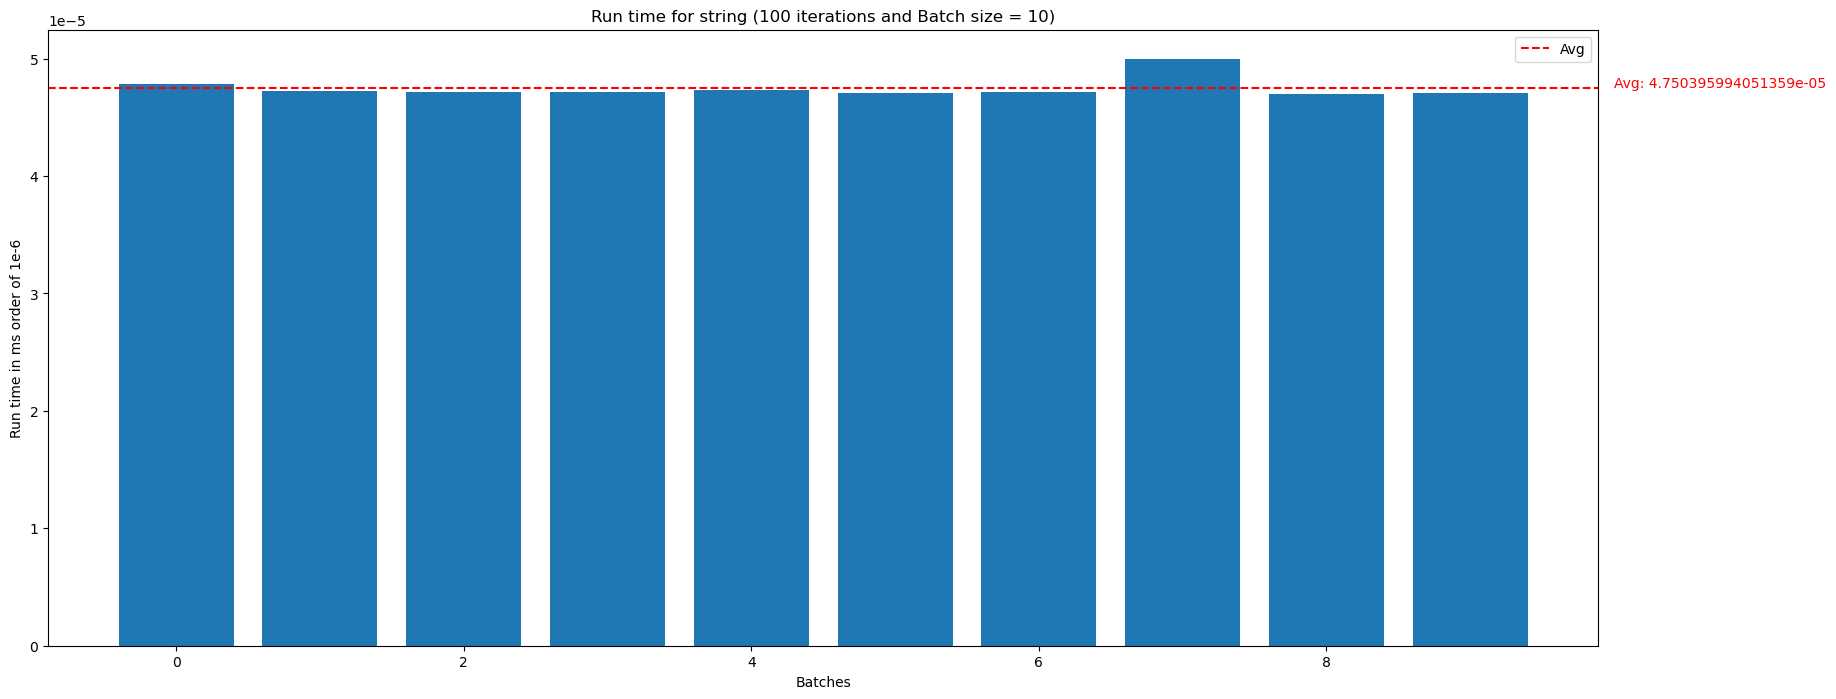

In [56]:
# BEST CASE

mergelist = unsortedlist.copy()
mergesort_time(runs, runs//10, mergelist)

quicklist = unsortedlist.copy()
quicksort_time(runs, runs//10, quicklist)

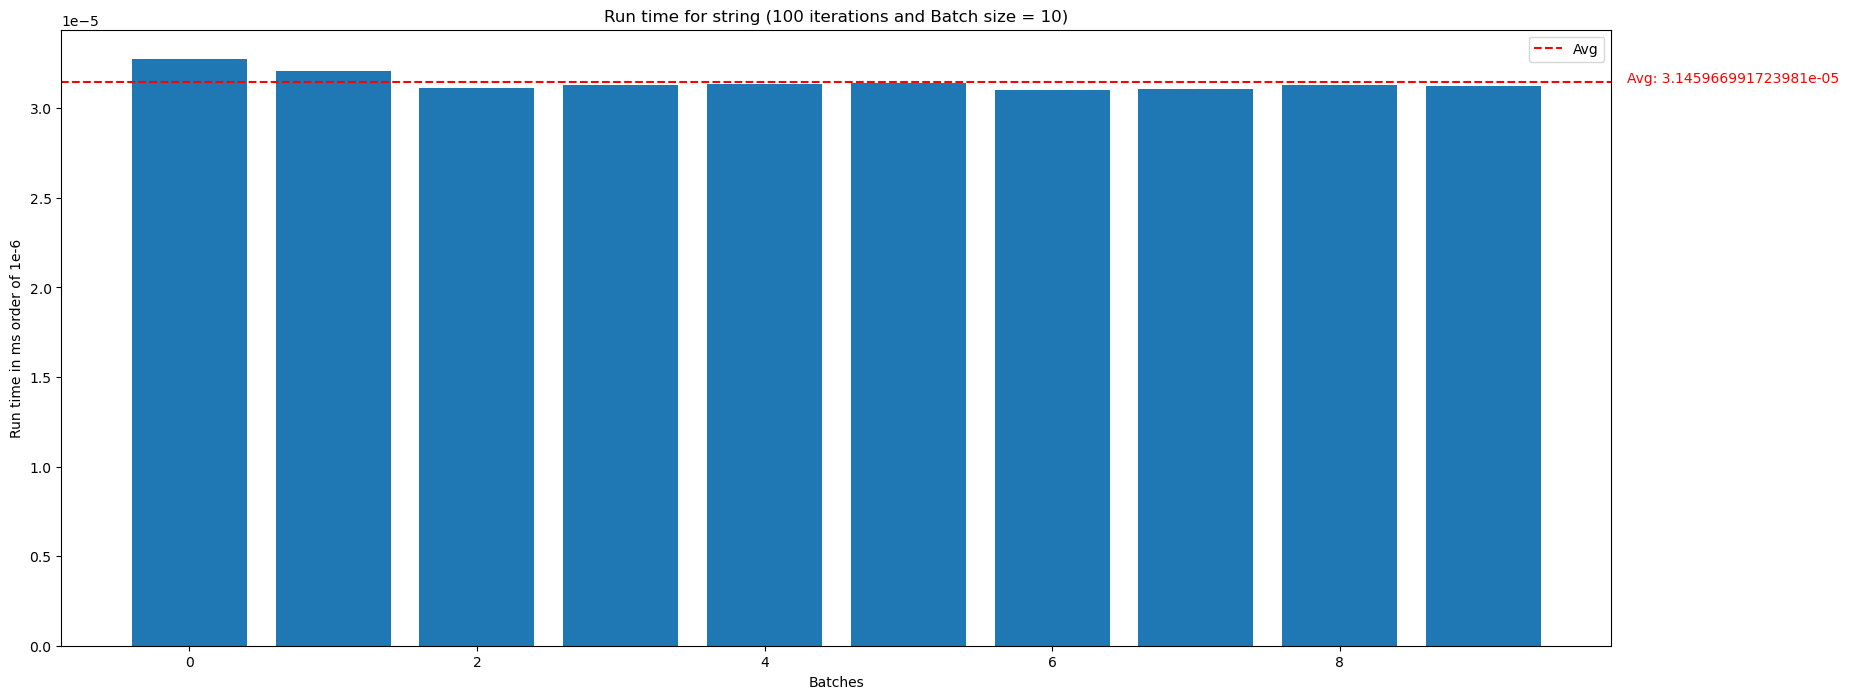

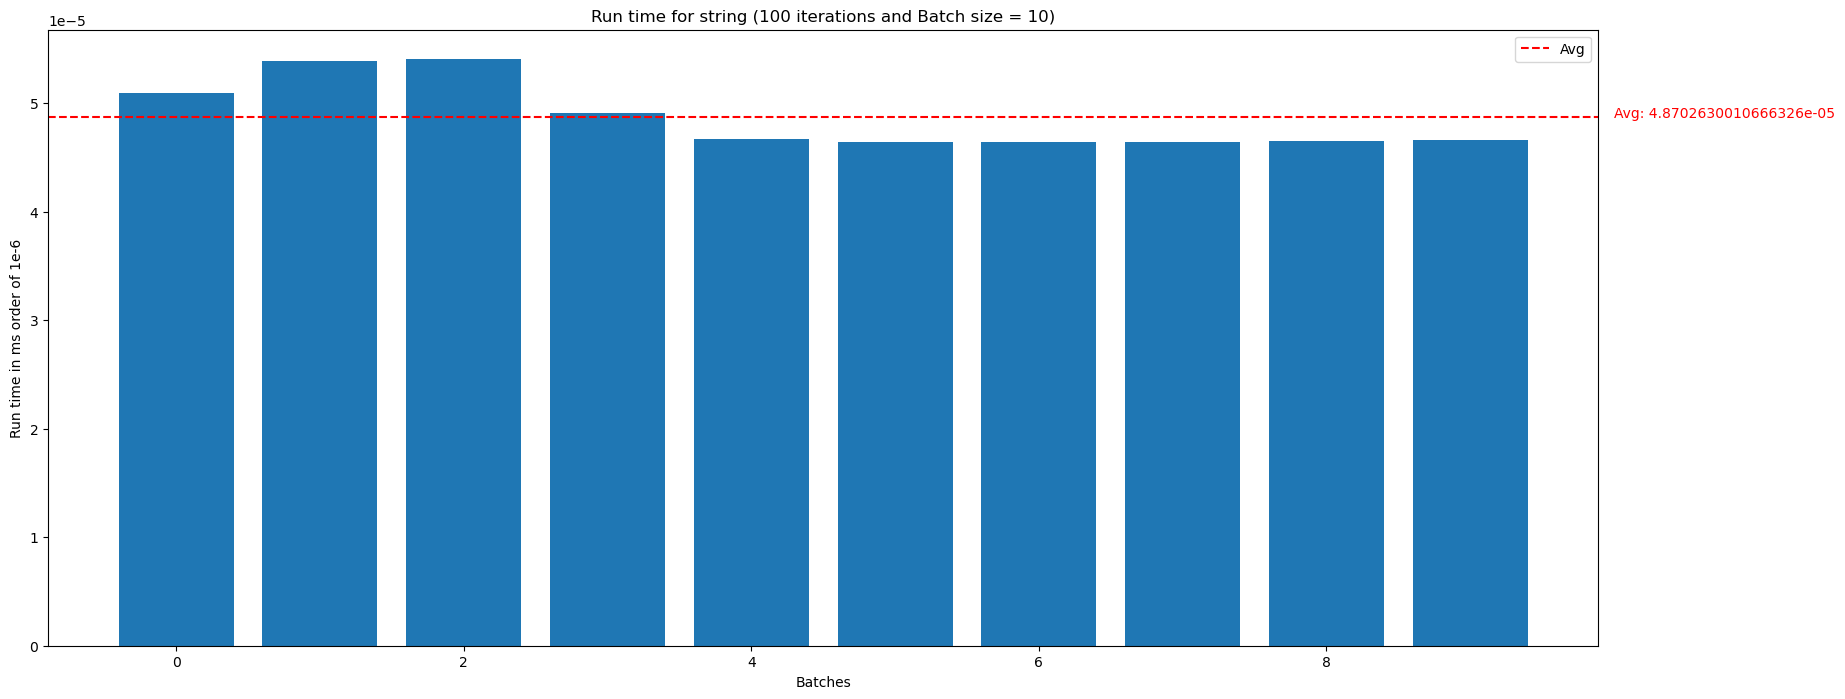

In [57]:
# AVG CASE

mergelist = halfsortedlist.copy()
mergesort_time(runs, runs//10, mergelist)

quicklist = halfsortedlist.copy()
quicksort_time(runs, runs//10, quicklist)

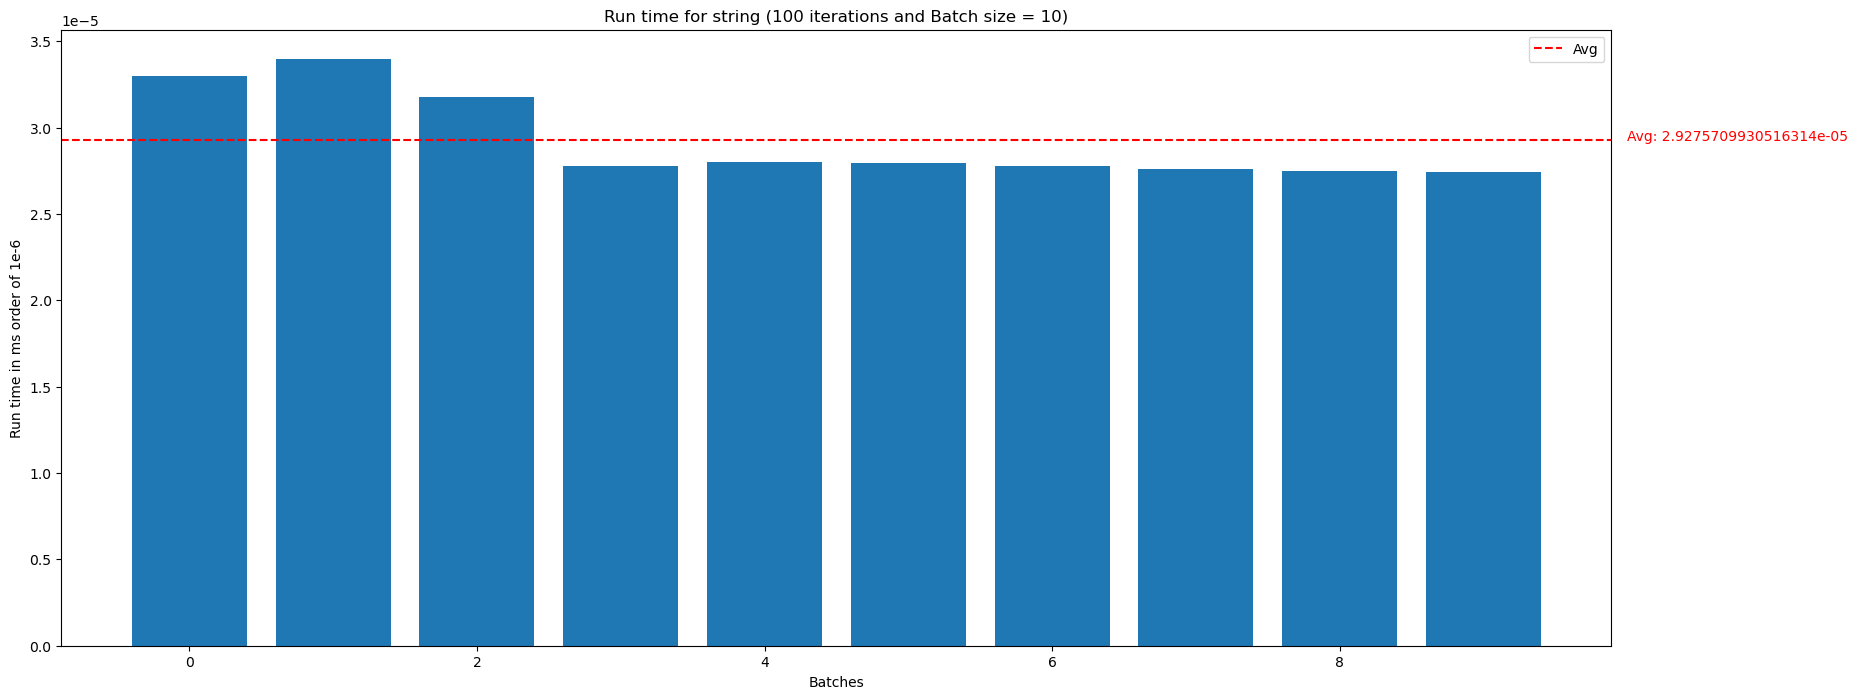

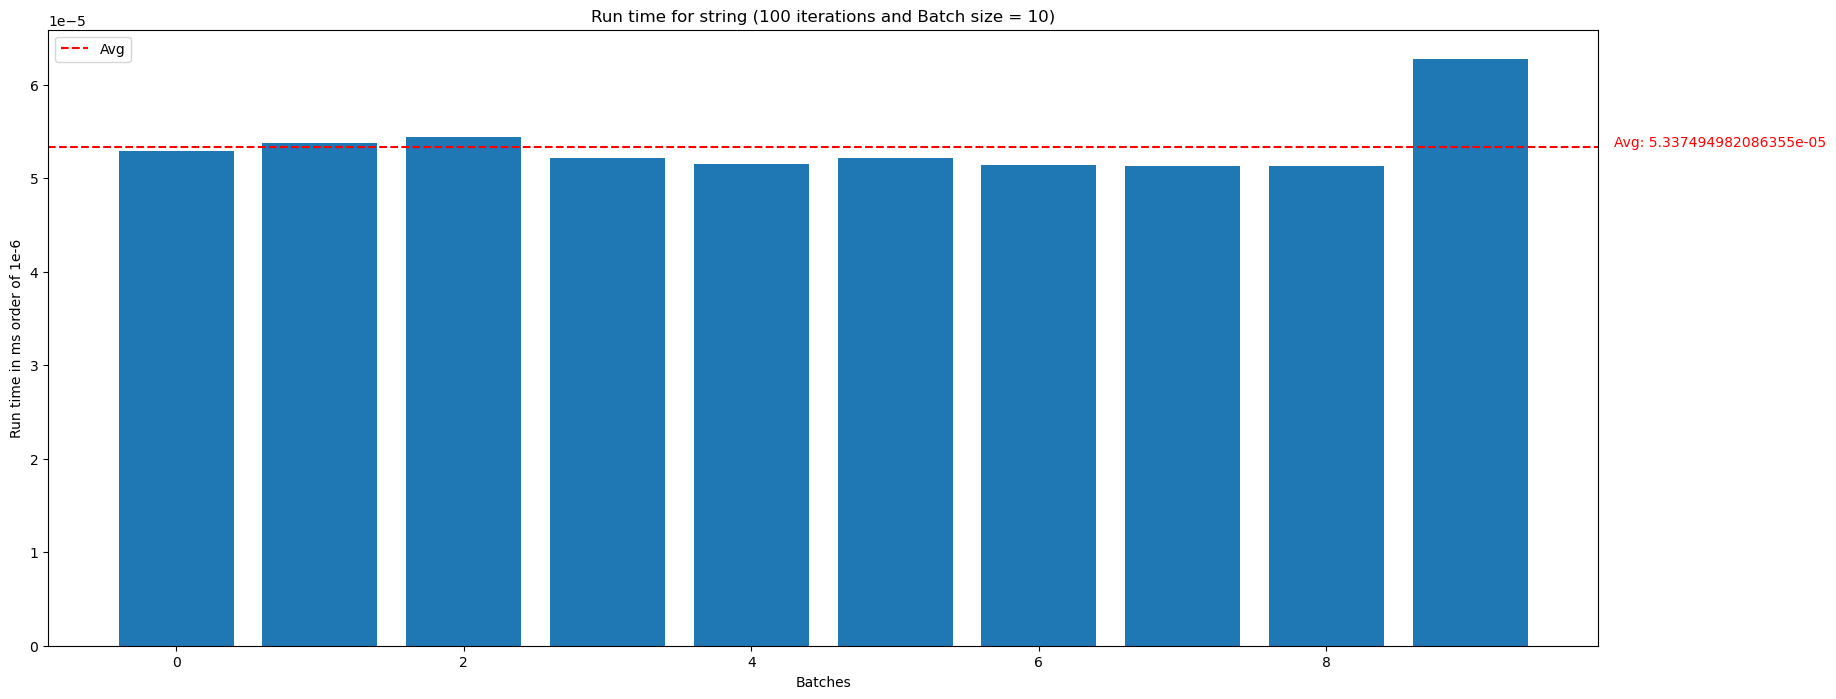

In [58]:
# WORST CASE


mergelist = sortedlist.copy()
mergesort_time(runs, runs//10, mergelist)

quicklist = sortedlist.copy()
quicksort_time(runs, runs//10, quicklist)

In this section, provide a detailed outline of:
- The experiments you ran and the rationale behind your worst case scenario.
- The plots showing the run times.

Further explain how you computed the swaps and verify that you calculation is correct, by applying it on a diifferent list under same experimental conditions.

In [53]:
## your implementation and code goes here

listlength = 50
runs = 100

unsortedlist = create_custom_list(listlength,10000)

sortedlist= unsortedlist.copy()

bestcaseswaps = quicksort(sortedlist)
sortedlist.reverse()

halfsortedlist = sortedlist.copy()
# replace half of sorted list with unsorted list (avg case)
halfsortedlist[len(halfsortedlist)//2:len(halfsortedlist)] = unsortedlist[len(halfsortedlist)//2:len(halfsortedlist)]

avgcaseswaps = quicksort(halfsortedlist.copy())
worstcaseswaps = quicksort(sortedlist.copy())

print(bestcaseswaps)
print(avgcaseswaps)
print(worstcaseswaps)


142
194
649


**Reflection**: To compare Merge and Quick sorts, I ran three cases with the same list length (50) and runs (100). The best case (136 swaps) is a "random" list which is distant from worst case behavior. The worst case is a fully sorted list (649 swaps) which is reversed for debug purposes. The average case (147 swaps) contains a fully sorted list in its first half and in its second half contains the unsorted list. When computing the swaps again using a different list, we can see that the worst case has the same # of swaps, so our computation is correct.

---
---

### PART F

Traditionally, Insertion Sort is worst than Heap Sort and Merge Sort. Now that you are a master at critical evaluation of sorting and searching algorithms, design an experiment to show that this may not be universally true. That is, there maybe scenarios where insertion sort is better than merge and heap sort.

HINT: Think about the Best Case of insertion sort.

Again, provide:
- An explicit outline of the experiments you ran. That is, list length values, how many “runs”, etc.
- A graph of list length vs time displaying the appropriate three curves showing. List lengths should be small here.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.
- Reflect on why these are experiments are important. 

HINT: Can you create some sort of "hybrid" sort that would be better?

In [31]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    
    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)

    return merge(left_half, right_half)

def merge(left, right):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])

    return result

def heap_sort(arr):
    def heapify(arr, n, i):
        largest = i
        left_child = 2 * i + 1
        right_child = 2 * i + 2

        if left_child < n and arr[left_child] > arr[largest]:
            largest = left_child

        if right_child < n and arr[right_child] > arr[largest]:
            largest = right_child

        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)

    n = len(arr)

    # Build max heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Extract elements one by one
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)

    return arr


def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

    return arr


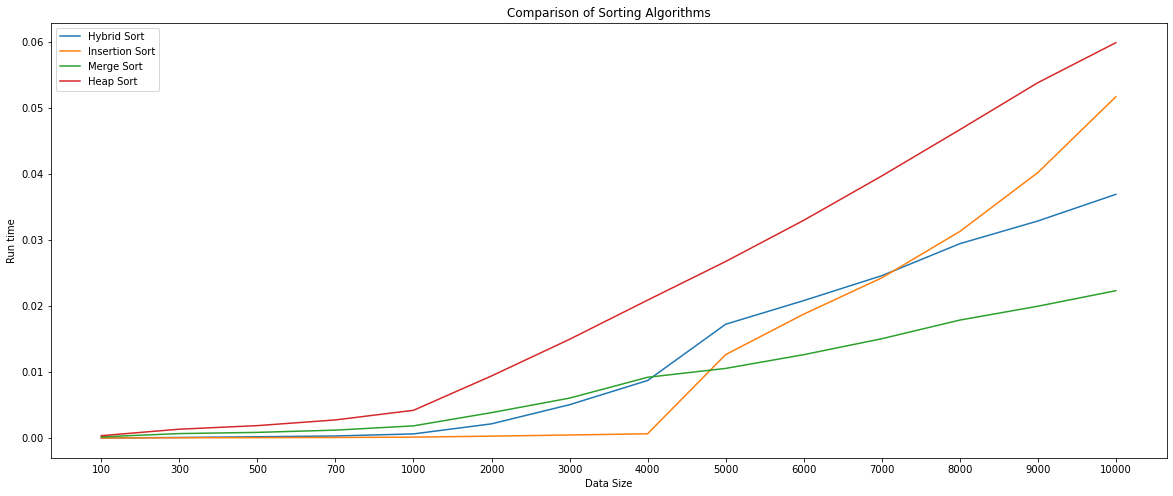

In [32]:
## your implementation and code goes here
def hybrid_sort(data):
    threshold = 4000
    if len(data) <= threshold:
        return insertion_sort(data)
    else:
        return merge_sort(data)
    
def measure_time(func, data):
    runs=75
    sum = 0
    for _ in range(runs):
        start = timeit.default_timer()
        func(data)
        stop=timeit.default_timer()
        sum += stop-start
    return sum/runs
    

sizes=[100, 300, 500, 700, 1000, 2000, 3000, 4000, 5000,6000, 7000,8000,9000, 10000]
algs=["hybrid", "ins", "merge", "heap"]
hybrid_time =[]
insertionsort_time = []
mergesort_time = []
heapsort_time =[]

for size in sizes:
    data = [random.randint(1,1000000) for _ in range(size)]
    for a in algs:
        if a =="hybrid":
            hybrid_time.append(measure_time(hybrid_sort,data))
        elif a == "ins":
            insertionsort_time.append(measure_time(insertion_sort,data))
        elif a == "merge":
            mergesort_time.append(measure_time(merge_sort, data))
        elif a == "heap":
            heapsort_time.append(measure_time(heap_sort, data))


xlab = ['100', '300', '500', '700', '1000', '2000', '3000', '4000', '5000','6000', '7000','8000','9000', '10000']
x = np.arange(0, len(xlab),1)
fig=plt.figure(figsize=(20,8))
plt.plot(xlab, hybrid_time, label='Hybrid Sort')
plt.plot(xlab, insertionsort_time, label='Insertion Sort')
plt.plot(xlab, mergesort_time, label='Merge Sort')
plt.plot(xlab, heapsort_time, label='Heap Sort')

# Adding labels and title
plt.xlabel("Data Size")
plt.ylabel("Run time")
plt.title('Comparison of Sorting Algorithms')

# Adding x-axis ticks
plt.xticks(x,xlab)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

**Reflection**:

---
    Experiment Outline :
        1. Generate Lists: Random list created in the size of 100, 300, 500, 700, 1000, 2000, 3000, 4000, 5000,6000, 7000,8000,9000, and 10000. The integer inside the list is between 1 and 1000000.
        2. Measure Execution Time: Employ the 'measureTime' function to obtain the average runtime in multiple runs (75 times in this experiment but can be adjusted) for each case.
        3. Data Collection: Store the average run times for each case in a list named hybrid_time, insertionsort_time, mergesort_time and heapsort_time(each for hybrid sort, insertion sort, merge sort and heap sort).

    Plotting Outline :
        1. x values show the size of the data
        2. y values show the run time of each algorithm on the list sized corresponding to the x values.
        
Insertion sort takes the shortest when the size of data is less than 4000 but exceeds merge sort when data size becomes larger than 5000 making merge sort taking the shortest time.
So, I made a hybrid sort that uses insertion sort when the data size is less than 4000 and uses merge sort when 
the data size is larger than 4000.
Heap sort always takes the longest regardless of the data size.
Hybrid sort always take slightly longer than insertion sort(when data size less than 4000) and merge sort(when data size larger than 4000) since it checks the data size before running sorting algorithms.
This experiment shows data size matter when choosing the sorting algorithm that works the fastest.

---

---
---

**Team Contributions**: In below section describe in detail how you distributed the workload and contributions of each member in the task.

Faizan - Part A

Lynn - Part B, C, F

Mustafa - Part D, E

All members engaged in VC and team disscusions 

---
---